#### <CENTER><h1><u>Gradient Descent & Gradient Boosting</u></CENTER></h1>

<br>

<CENTER>(TEAM CONTRIBUTORS: CHAITANYA DEVARSHI, SHASHANK SHEKHAR, BITTERLEIN KONNOTH BIJU)</CENTER>

-------
-------


===================================================================================================================

<h2><u>Content</u></h2>

1. [Introduction](#1.-Introduction)

  1.1 [Problem Statement](#1.1-Problem-Statement)
  
  1.2 [Methodology](#1.2-Methodology)
  

2. [Data Loading & Preparation](#2.-Data-Loading-&-Preparation)

  2.1 [Read the Data](#2.1-Read-the-Data)
  
  2.2 [Data In Usable form](#2.2-Data-In-Usable-Form)
  
  2.3 [Data Validation](#2.3-Data-Validation)
  


3. [EDA](#3.-Exploratory-Data-Analysis)

  3.1 [Missing Values](#3.1-Missing-Values)
  
  3.2 [Univariate](#3.2-Univariate-Analysis)
  
   - 3.2.1 [For numeric features](#3.2.1-Univariate-Analysis-for-numeric-features)
     
   - 3.2.2 [For Binary features](#3.2.2-Univariate-Analysis-for-Binary-features)
     
  3.3 [Bivariate](#3.3-Bivariate-Analysis)
  
  3.4 [Multivariate](#3.4-Multivariate-Analysis)


4. [Data Cleaning](#4.-Data-Cleaning)

  4.1 [Handling Skewness](#4.1-Handling-Skewness)
  
  4.2 [Handling Outliers](#4.2-Handling-Outliers)


5. [Prepped Data Review](#5.-Prepped-Data-Review)


6. [Dimensionality Reduction](#6.-Dimensionality-Reduction)

  6.1 [Variance Threshold](#6.1-Variance-Threshold)
  
  6.2 [Forward Feature Selection](#6.2-Forward-Feature-Selection)


7. [Modeling](#7.-Decision-Tree-+-Random-Forest-Modeling)

  7.1 [Decision Tree Model](#7.1-Decision-Tree-Model)
  
  7.2 [Random Forest Model](#7.2-Random-Forest-Model)
  
  7.3 [Gradient Boosting Classifier Model](#7.3-Gradient-Boosting-Classifier-Model)
  
  7.4 [XG Boost Classifier Model](#7.4-XG-Boost-Classifier-Model)
  
  
8. [Model Selection](#8.-Model-Selection)


9. [Conclusion](#Conclusion)


===================================================================================================================

## 1. Introduction

- The dataset comprised of information pertaining to NY State High School graduation metrics for the 2018-2019 school year. The dataset is sourced from the NY State Education Department [(NYSED)](https://data.nysed.gov/downloads.php). The dataset is comprised of more than 73,000 observations, each of which pertains to a particular NY State school district and associated sub groupings/categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. 


- __A data dictionary describing the attributes contained within the file is provided below.__

|Data Set Attribute |Description|
|:-------------------|:-----------|
|report_school_year |Indicates school year for which high school graduation info is being reported|
|aggregation_index |Numeric code identifying manner in which high school graduation data has been aggregated|
|aggregation_type |Text description of how high school graduation data has been aggregated|
|aggregation_name | Name of city school with district |
|nrc_code |Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district|
|nrc_desc |Text description of the type of school district|
|county_code |Numeric code for county name|
|county_name |Full name of applicable NY State county|
|nyc_ind |Indicates whether or not the school district resides within the borders of NYC|
|membership_desc |Indicates school year in which students first enrolled in High School|
|subgroup_code |Numeric code identifying student subgrouping|
|subgroup_name |Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)|
|enroll_cnt |How many students of the indicated subgrouping were enrolled during the given school year|
|grad_cnt |How many enrolled students of the indicated subgrouping graduated at the end of the given school year|
|grad_pct |What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year|
|reg_cnt |How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma|
|reg_pct |What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma|
|dropout_cnt |How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year|
|dropout_pct |What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year|

----

<b> [Back to Content](#Content) </b>

## 1.1 Problem Statement

- Our task for Project 3 is to construct a series of different models for a provided data set and compare/contrast the performance of the varying models against one another. Specifically, we will be constructing a decision tree, a random forest, a gradient boosting classifier, and an XG Boost classifier.


- The response variable  we will be modeling will be a categorical indicator variable derived from the dataset’s dropout_pct attribute.The new indicator variable will be low, medium and high named as “dropout_pct_level”.


- Therefore, our task is to construct and compare/contrast a series of classification models, (after completing the necessary EDA and data prep work) after splitting the data into training and testing subsets, using the training subset to construct each of the following models Decision Tree,Random Forest,Gradient Boosting Classifier and XG Boost Classifier.

----

<b> [Back to Content](#Content) </b>

## 1.2 Methodology

<h3><u> To address this project, we will follow these below steps :- </u></h3>

1. **Load the dataset**: Upload the ` M11_Data.csv` file from the DAV 6150 Github Repository.

2. **Read the dataset**: Using a Jupyter Notebook, read the dataset from the respective Github repository and load it into a Pandas DataFrame.

3. **Perform EDA**: Carry out Exploratory Data Analysis to examine the dataset's structure and understand the variables.

4. **Identify and rectify issues**: Detect data quality and integrity issues such as missing values or outliers during EDA, and take appropriate actions to address them.

5. **Prepped Data Review**: Here, we will cross check every thing and will make sure our data is ready for further analysis.

6. **Feature Scale, Selection & Dimensionality Reduction**: Applying feature selection techniques and perform dimensionality reduction to prepare the data for modeling.

7. **Classifier Modeling** :Explain  and present our  classifier modeling work, including your feature selection / dimensionality reduction decisions and the process by which we selected the hyperparameters for our models. Specifically, we will be constructing a decision tree, a random forest, a gradient boosting classifier, and an XG Boost classifier

8. **Models Selection**: Among the 4  different models namely Decision Tree, Random Forest, Gradient Boosting Classifier and XG Boost Classifierwe will make our judgment to select the best-performing model.

9. **Conclusion**: We will conclude our work.

----

<b> [Back to Content](#Content) </b>

## 2. Data Loading & Preparation

In [1]:
# Importing basic Libraries.

import pandas as pd 
import numpy as np

# Importing Libraries for statistical analysis.

import statsmodels.api as sm
from scipy import stats

# Importing Libraries for machine learning models.

import sklearn
from xgboost import XGBClassifier
from sklearn import metrics
import imblearn
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import PoissonRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier



# Importing Libraries for plotting the graphs.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


# Importing Libraries for Standarising and Normalising.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import Library for PCA

from sklearn.decomposition import PCA


# Import missingno library for checking on missing values.

import missingno as msno


# Importing train_test_split .

from sklearn.model_selection import train_test_split, cross_val_score, KFold


# Importing Library for imputing null values.

from sklearn.impute import KNNImputer


# Importing filterwarnings from warnings to ignore warnings.

import warnings
warnings.filterwarnings("ignore")

### 2.1 Read the Data

In [2]:
# Loading the data from the github repository DAV-6150.

NY_State_High_School = pd.read_csv("https://raw.githubusercontent.com/chetan5373/DAV-6150/refs/heads/main/M11_Assignment/M11_Data.csv")
df = NY_State_High_School.copy()

df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome   

   subgroup_code                  subgroup_name enroll_cnt grad_cnt grad_pct  \
0              1                   All Students        658      464      71%   
1              2                         Female        324      246      76%   
2              3                           Male        334      218      65%   
3              4  American Indian/Alaska Native          -        -        -   
4              5                          Black        367      248      68%   

  reg_cnt reg_pct dropout_cnt dropout_pct  
0     310     47%         148         22%  
1     169     52%          65         20%  
2     141     42%          83         25%  
3       -       -           -           -  
4     183     50%          91         25%

In [3]:
# Identifing how many rows and columns the dataframe consist of.

df.shape

(73152, 19)

- The dataset consists of **73152 rows** and **19 columns**. 

In [4]:
# Getting a concise summary of the DataFrame .

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

**Dataset observation:**



- Index ranges from 0-73151.

- Total number of attributes are 9.

- Where 5 are 'int' and 14 are 'object'.




**In this dataset, most of the columns that should be of float or int data types are currently of object data type. We will change those first for better analysis.**

In [5]:
# selecting the needed columns to change 
columns_to_convert = ['aggregation_index', 'nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']

#Fixing the data type
df[columns_to_convert] = df[columns_to_convert].astype(object)

# Display the data types to verify the conversion
df.dtypes


report_school_year    object
aggregation_index     object
aggregation_type      object
aggregation_name      object
nrc_code              object
nrc_desc              object
county_code           object
county_name           object
nyc_ind               object
membership_desc       object
subgroup_code         object
subgroup_name         object
enroll_cnt            object
grad_cnt              object
grad_pct              object
reg_cnt               object
reg_pct               object
dropout_cnt           object
dropout_pct           object
dtype: object

In [6]:
# Columns with suffix '_pct' attributes.
columns = ['grad_pct','reg_pct','dropout_pct' ]

for column in columns:
        
        # For changing the '-' values to NaN and then removing the % sign, lastly concert it to float type.
        df[column] = df[column].str.replace('-', 'NaN', regex=False)
        df[column] = df[column].str.replace('%', '', regex=False).astype(float)

In [7]:
# Columns with suffix '_cnt' attributes.
columns = ['enroll_cnt', 'grad_cnt', 'reg_cnt','dropout_cnt']

for column in columns:
        
        # For changing the '-' values to NaN.
        df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
#sanity check 
df.dtypes

report_school_year     object
aggregation_index      object
aggregation_type       object
aggregation_name       object
nrc_code               object
nrc_desc               object
county_code            object
county_name            object
nyc_ind                object
membership_desc        object
subgroup_code          object
subgroup_name          object
enroll_cnt            float64
grad_cnt              float64
grad_pct              float64
reg_cnt               float64
reg_pct               float64
dropout_cnt           float64
dropout_pct           float64
dtype: object

----

<b> [Back to Content](#Content) </b>

## 3. Exploratory Data Analysis

- Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. 

In [9]:
# Checking columns names.

df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct'],
      dtype='object')

In [10]:
# sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   report_school_year  73152 non-null  object 
 1   aggregation_index   73152 non-null  object 
 2   aggregation_type    73152 non-null  object 
 3   aggregation_name    73152 non-null  object 
 4   nrc_code            73152 non-null  object 
 5   nrc_desc            73152 non-null  object 
 6   county_code         73152 non-null  object 
 7   county_name         73152 non-null  object 
 8   nyc_ind             73152 non-null  object 
 9   membership_desc     73152 non-null  object 
 10  subgroup_code       73152 non-null  object 
 11  subgroup_name       73152 non-null  object 
 12  enroll_cnt          39674 non-null  float64
 13  grad_cnt            39674 non-null  float64
 14  grad_pct            39674 non-null  float64
 15  reg_cnt             39674 non-null  float64
 16  reg_

### 3.1 Missing Values

In [11]:
# checking for null valus 
df.isnull().sum()

report_school_year        0
aggregation_index         0
aggregation_type          0
aggregation_name          0
nrc_code                  0
nrc_desc                  0
county_code               0
county_name               0
nyc_ind                   0
membership_desc           0
subgroup_code             0
subgroup_name             0
enroll_cnt            33478
grad_cnt              33478
grad_pct              33478
reg_cnt               33478
reg_pct               33478
dropout_cnt           33478
dropout_pct           33478
dtype: int64

There is missing values in our dataset.

In [12]:
# checking for duplicate values.

df.duplicated().sum()

0

There are no duplicate values in the dataset 

----

<b> [Back to Content](#Content) </b>

### 3.2 Univariate Analysis

In [13]:
df.head(10)

report_school_year aggregation_index aggregation_type  \
0            2018-19                 3         District   
1            2018-19                 3         District   
2            2018-19                 3         District   
3            2018-19                 3         District   
4            2018-19                 3         District   
5            2018-19                 3         District   
6            2018-19                 3         District   
7            2018-19                 3         District   
8            2018-19                 3         District   
9            2018-19                 3         District   

              aggregation_name nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
5  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
6  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
7  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
8  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
9  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   

  county_code county_name nyc_ind                     membership_desc  \
0           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
1           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
2           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
3           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
4           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
5           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
6           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
7           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
8           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
9           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   

  subgroup_code                  subgroup_name  enroll_cnt  grad_cnt  \
0             1                   All Students       658.0     464.0   
1             2                         Female       324.0     246.0   
2             3                           Male       334.0     218.0   
3             4  American Indian/Alaska Native         NaN       NaN   
4             5                          Black       367.0     248.0   
5             6                       Hispanic        98.0      58.0   
6             7         Asian/Pacific Islander        46.0      38.0   
7             8                          White       130.0     105.0   
8             9                    Multiracial         NaN       NaN   
9            10     General Education Students       544.0     415.0   

   grad_pct  reg_cnt  reg_pct  dropout_cnt  dropout_pct  
0      71.0    310.0     47.0        148.0         22.0  
1      76.0    169.0     52.0         65.0         20.0  
2      65.0    141.0     42.0         83.0         25.0  
3       NaN      NaN      NaN          NaN          NaN  
4      68.0    183.0     50.0         91.0         25.0  
5      59.0     40.0     41.0         28.0         29.0  
6      83.0     26.0     57.0          8.0         17.0  
7      81.0     50.0     38.0         19.0         15.0  
8       NaN      NaN      NaN          NaN          NaN  
9      76.0    297.0     55.0        114.0         21.0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   report_school_year  73152 non-null  object 
 1   aggregation_index   73152 non-null  object 
 2   aggregation_type    73152 non-null  object 
 3   aggregation_name    73152 non-null  object 
 4   nrc_code            73152 non-null  object 
 5   nrc_desc            73152 non-null  object 
 6   county_code         73152 non-null  object 
 7   county_name         73152 non-null  object 
 8   nyc_ind             73152 non-null  object 
 9   membership_desc     73152 non-null  object 
 10  subgroup_code       73152 non-null  object 
 11  subgroup_name       73152 non-null  object 
 12  enroll_cnt          39674 non-null  float64
 13  grad_cnt            39674 non-null  float64
 14  grad_pct            39674 non-null  float64
 15  reg_cnt             39674 non-null  float64
 16  reg_

### 3.2.1 For Numeric Features

In [15]:
# Create function to plot dist and box plot for all the numeric features. 

def box_dist_plot(df , column):
    
    
    """
    
    This function is to plot box-plot and distribution-plot for a given column, 
    column's median value, with count and percentage of null values. 
    
    Parameters :-
        df : Dataframe           # df contains Dataframe.
        column : str             # Column name which is to be ploted.
    
    """
    
    plt.style.use('ggplot')  
    
    plt.figure(figsize=(18, 7))

    # Box plot.
    plt.subplot(121)
    sns.boxplot(y = df[column])  # Create box plot
    plt.title(f'Box Plot of : {column}')

    # Distribution plot.
    plt.subplot(122)
    sns.histplot(df[column], bins=30, kde=True)  # Create histogram with KDE
    plt.title(f'Distribution Plot of : {column}')

    # Adjusting the layout.
    plt.tight_layout() 

    plt.show()  

    # To print statistics.
    print(df[column].describe())
    print('Median :', df[column].median())
    print()
    print('Total Number of null values :', df[column].isnull().sum(), 'count,', 
          round(df[column].isnull().mean() * 100, 2), '%')
 

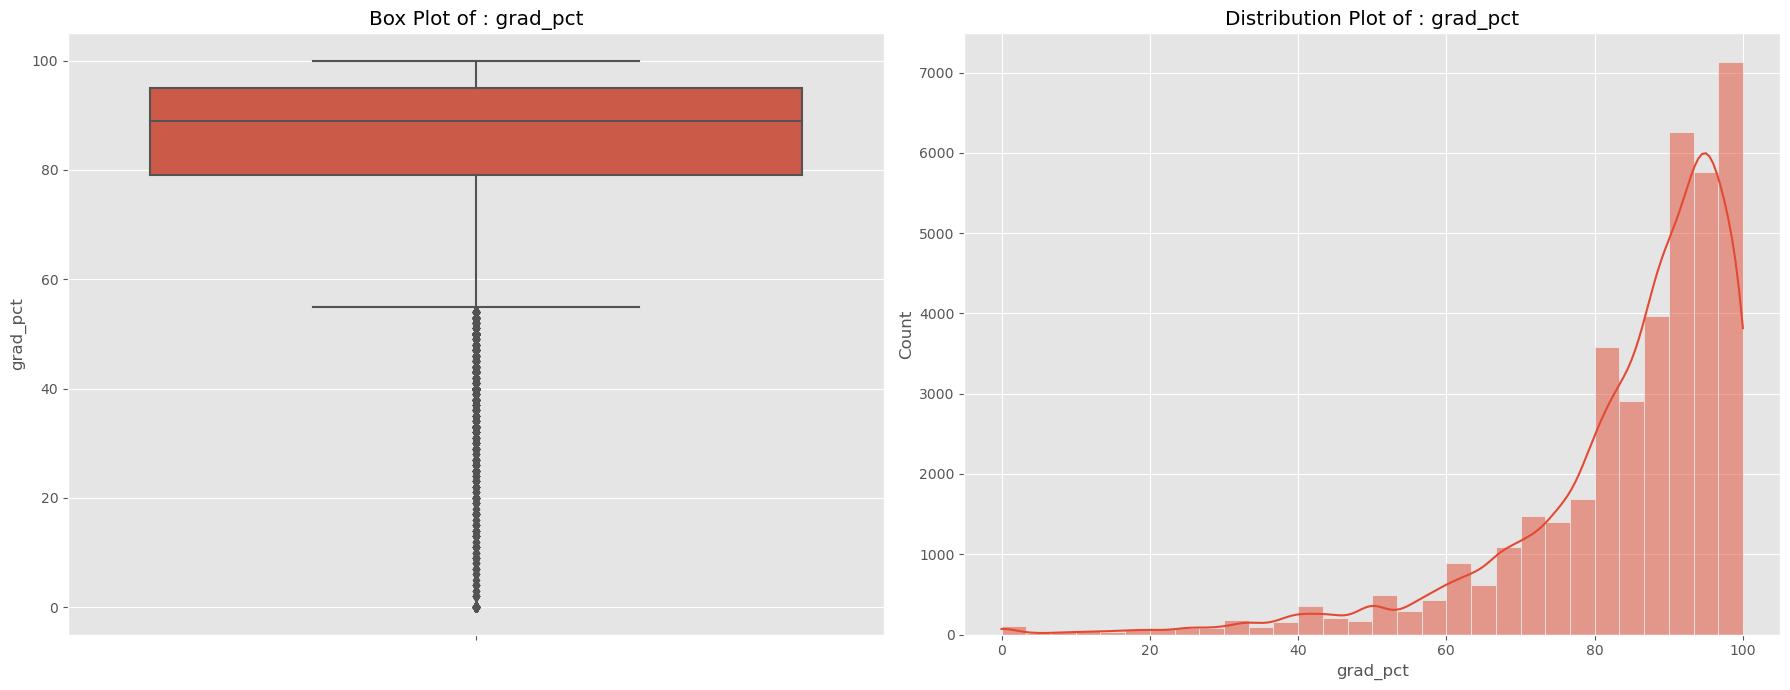

count    39674.000000
mean        84.406614
std         15.679500
min          0.000000
25%         79.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: grad_pct, dtype: float64
Median : 89.0

Total Number of null values : 33478 count, 45.76 %


In [16]:
#calling the function 
box_dist_plot(df,'grad_pct')

- In here grad_pct represents the percentage of enrolled students in the indicated subgroup who graduated by the end of the given school year. The data is left-skewed, contains outliers, and has a total of 33,478 null values.

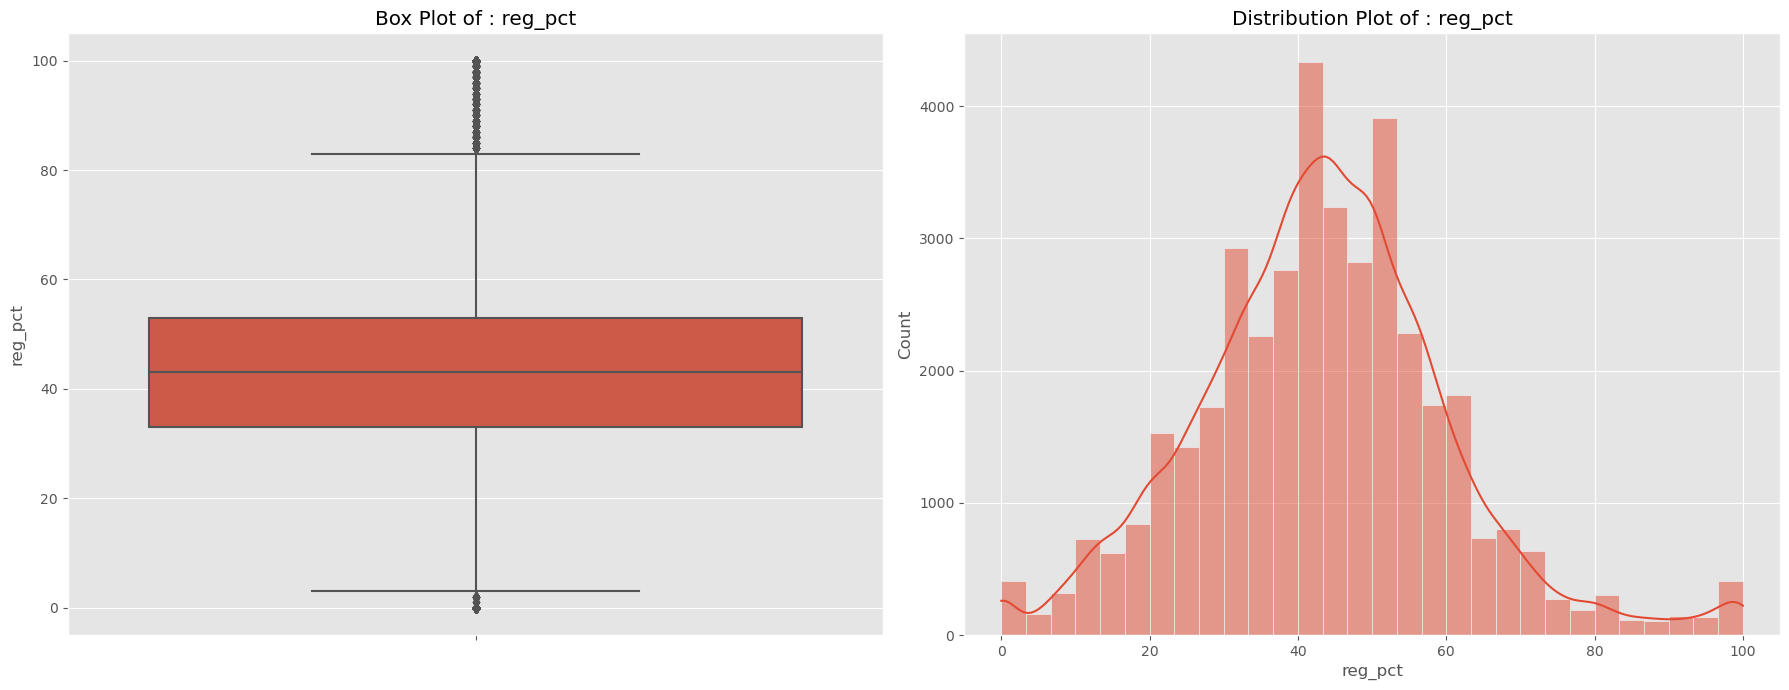

count    39674.000000
mean        43.371125
std         17.124891
min          0.000000
25%         33.000000
50%         43.000000
75%         53.000000
max        100.000000
Name: reg_pct, dtype: float64
Median : 43.0

Total Number of null values : 33478 count, 45.76 %


In [17]:
#calling the function 
box_dist_plot(df,'reg_pct')

- reg_pct represents the percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma. The data is normally distributed contains outliers, and has a total of 33,478 null values.

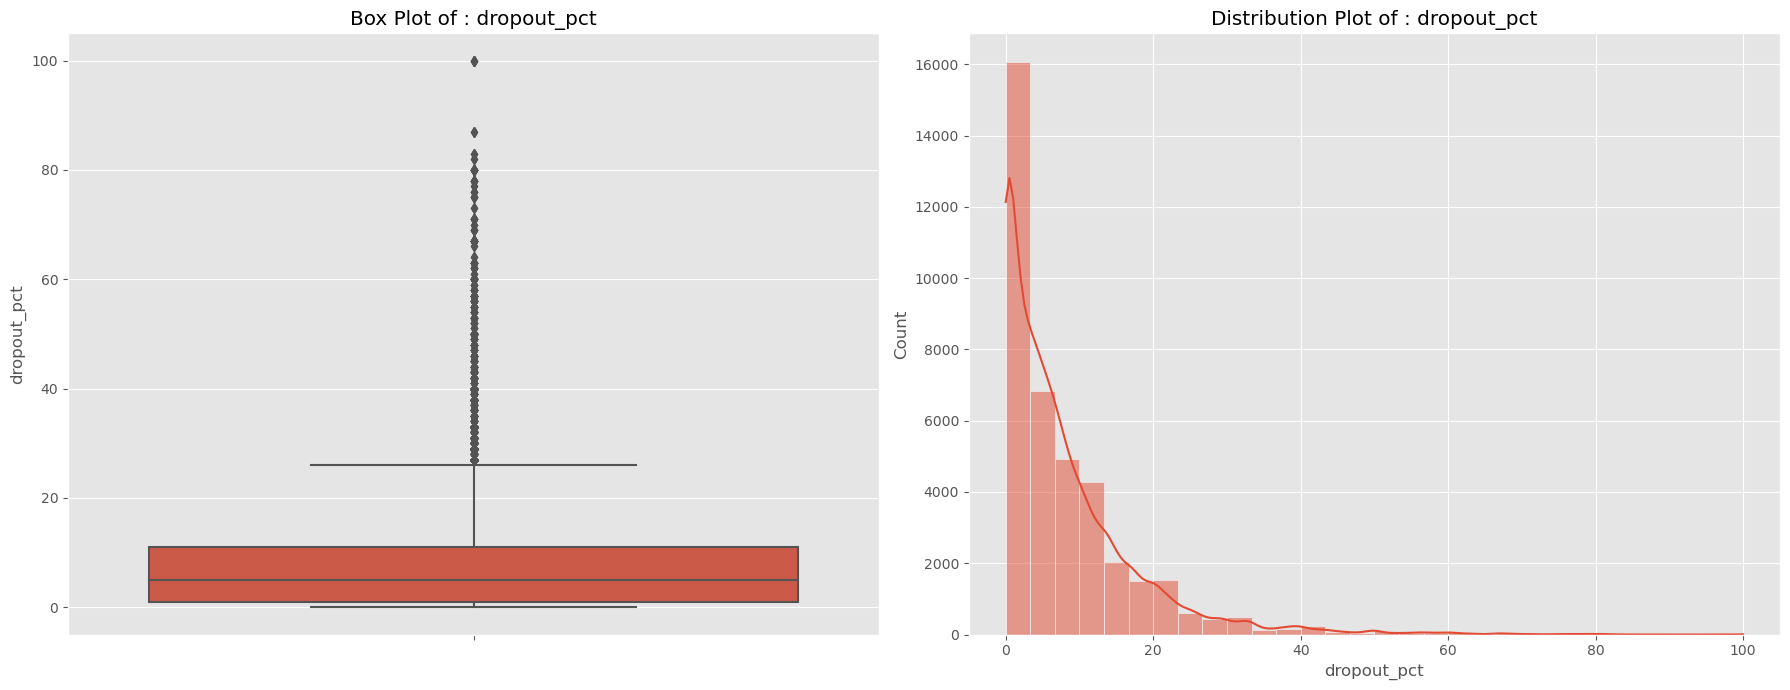

count    39674.000000
mean         7.963049
std          9.658698
min          0.000000
25%          1.000000
50%          5.000000
75%         11.000000
max        100.000000
Name: dropout_pct, dtype: float64
Median : 5.0

Total Number of null values : 33478 count, 45.76 %


In [18]:
#calling the function 
box_dist_plot(df,'dropout_pct') 

- The dropout_pct represents the percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year. The data is right-skewed, contains outliers, and has a total of 33,478 null values.

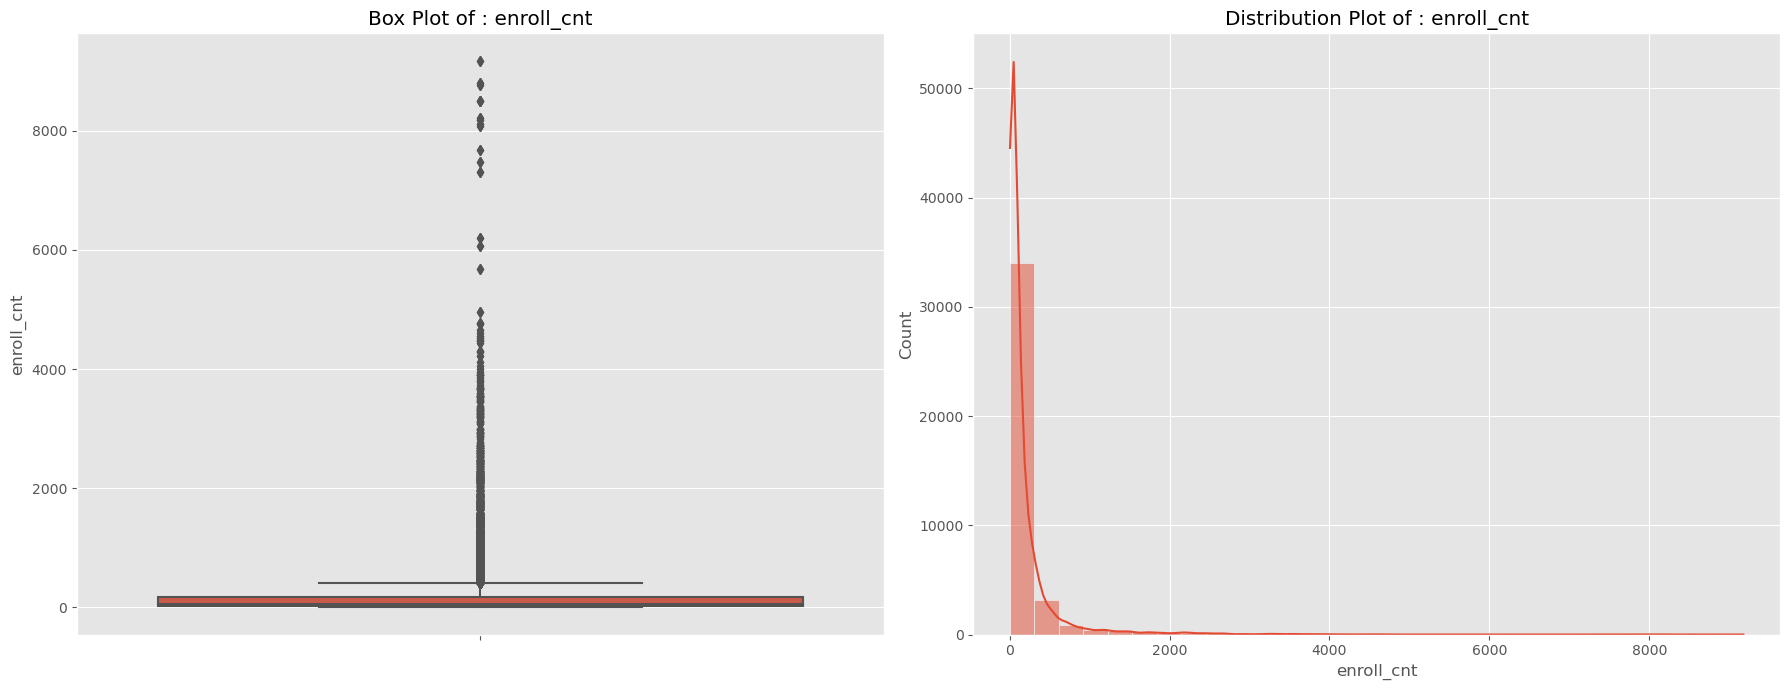

count    39674.000000
mean       192.120079
std        439.972474
min          5.000000
25%         25.000000
50%         66.000000
75%        179.000000
max       9176.000000
Name: enroll_cnt, dtype: float64
Median : 66.0

Total Number of null values : 33478 count, 45.76 %


In [19]:
#calling the function 
box_dist_plot(df,'enroll_cnt') 

- The enroll_cnt represents the number of students of the indicated subgrouping were enrolled during the given school year The data is right-skewed, contains outliers, and has a total of 33,478 null values.

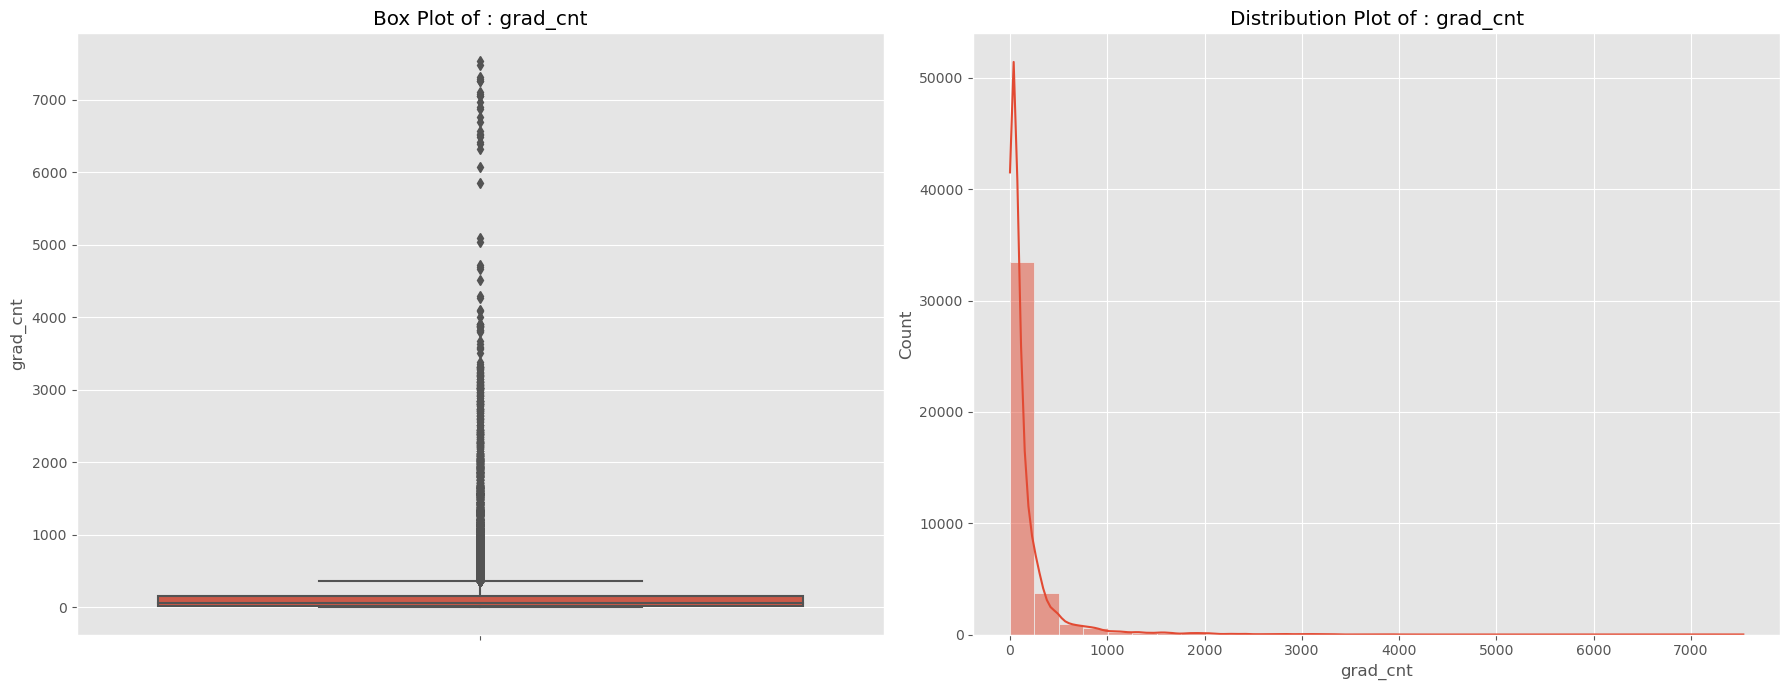

count    39674.000000
mean       161.178354
std        361.294773
min          0.000000
25%         20.000000
50%         57.000000
75%        156.000000
max       7540.000000
Name: grad_cnt, dtype: float64
Median : 57.0

Total Number of null values : 33478 count, 45.76 %


In [20]:
#calling the function 
box_dist_plot(df,'grad_cnt') 

- The grad_cnt represents the number of enrolled students of the indicated subgrouping graduated at the end of the given school year. The data is right-skewed, contains outliers, and has a total of 33,478 null values.

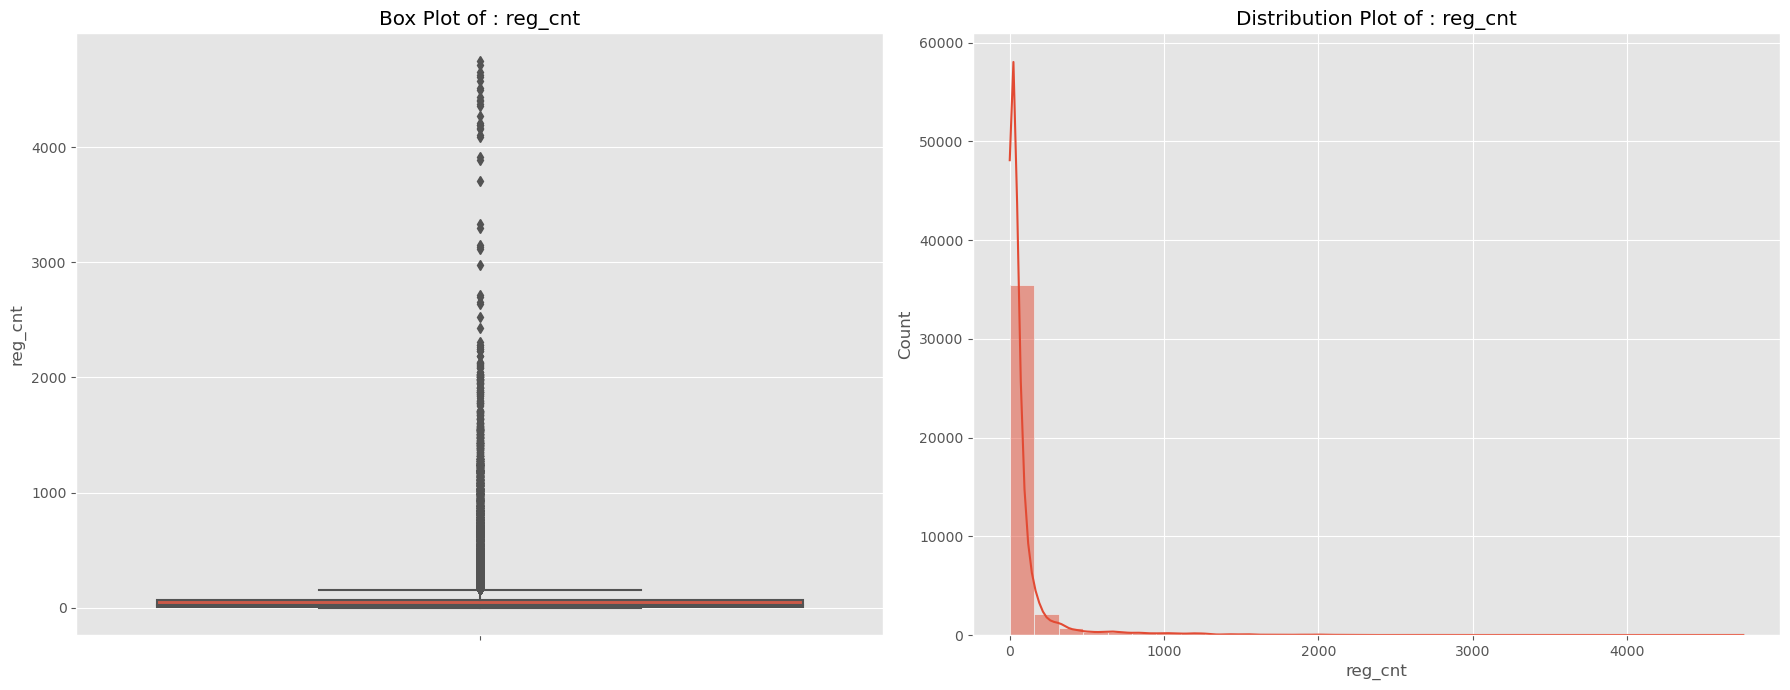

count    39674.000000
mean        86.804708
std        225.795826
min          0.000000
25%         10.000000
50%         27.000000
75%         69.000000
max       4752.000000
Name: reg_cnt, dtype: float64
Median : 27.0

Total Number of null values : 33478 count, 45.76 %


In [21]:
#calling the function 
box_dist_plot(df,'reg_cnt') 

- The reg_cnt represents the number of enrolled students of the indicated subgrouping were awarded a "Regents" diploma. The data is right-skewed, contains outliers, and has a total of 33,478 null values.

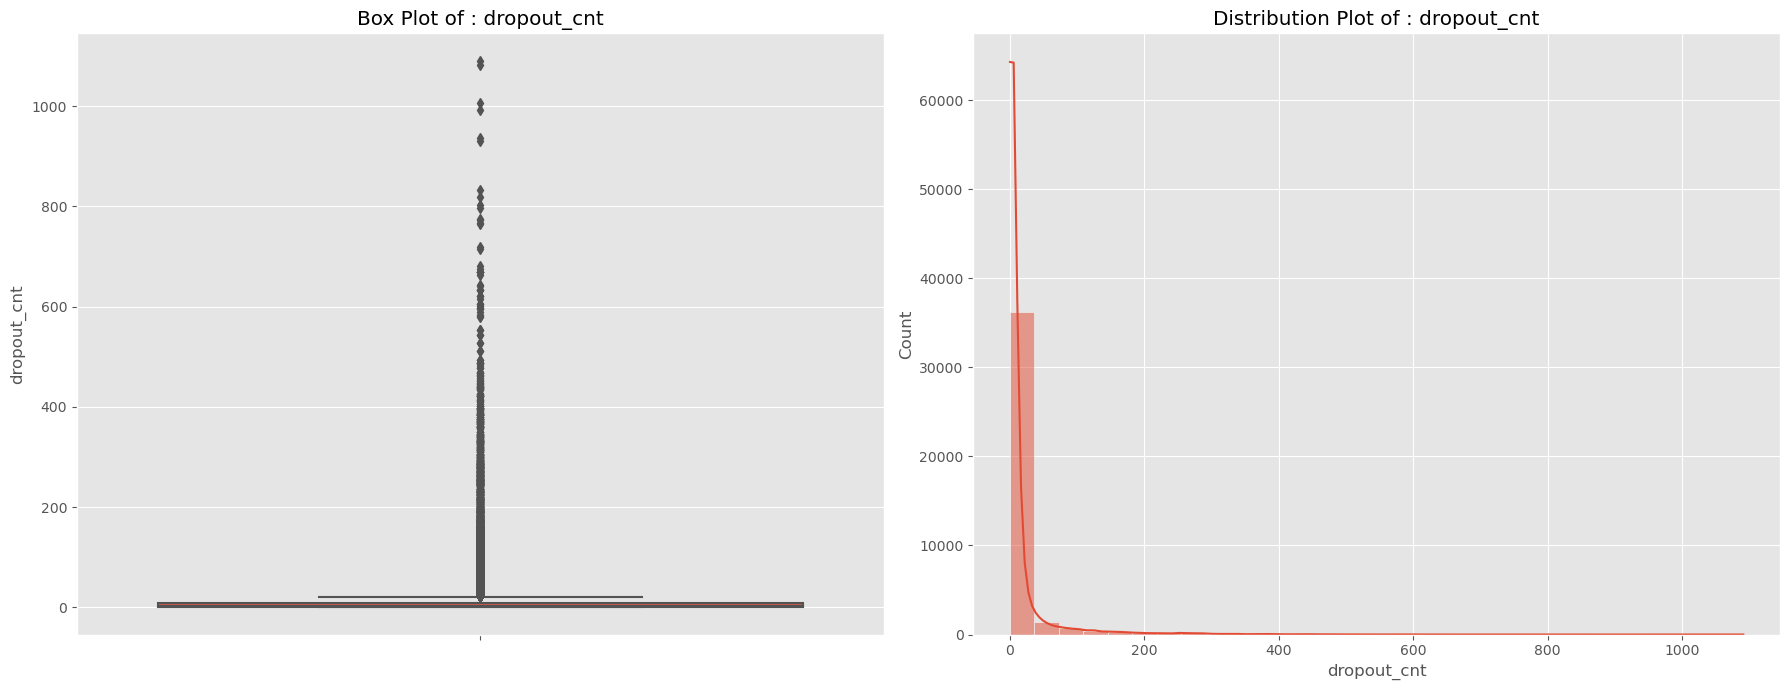

count    39674.000000
mean        16.239225
std         50.129834
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64
Median : 3.0

Total Number of null values : 33478 count, 45.76 %


In [22]:
#calling the function 
box_dist_plot(df,'dropout_cnt')

- The dropout_cnt represents the number of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year. The data is right-skewed, contains outliers, and has a total of 33,478 null values.

### 3.2.2 For Categorical Features

In [23]:
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt',
       'reg_pct', 'dropout_cnt', 'dropout_pct'],
      dtype='object')

In [24]:
# Generates a count plot and displays the count of each category for a specified column in the dataframe.

def plot_category_counts(df, column):
    
    """
    A function to plot a countplot and  displays the count of each category 
    for a specified column in the dataframe.
    
        column : str
        The name of the categorical column to plot and count.
    """

    # Count plot for the specified column.
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette="viridis")
    

    # Set plot labels and title
    plt.xlabel(column)  
    plt.ylabel('Count')     
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Count of {column}')

    # Display the plot
    plt.show()

    # Display count of each category
    counts = df[column].value_counts()
    print(f"\nCounts for {column}:\n{counts}")

    #For unique count of input
    unique_count = df[column].nunique()
    print(f"\nUnique for {column}:\n{unique_count}")

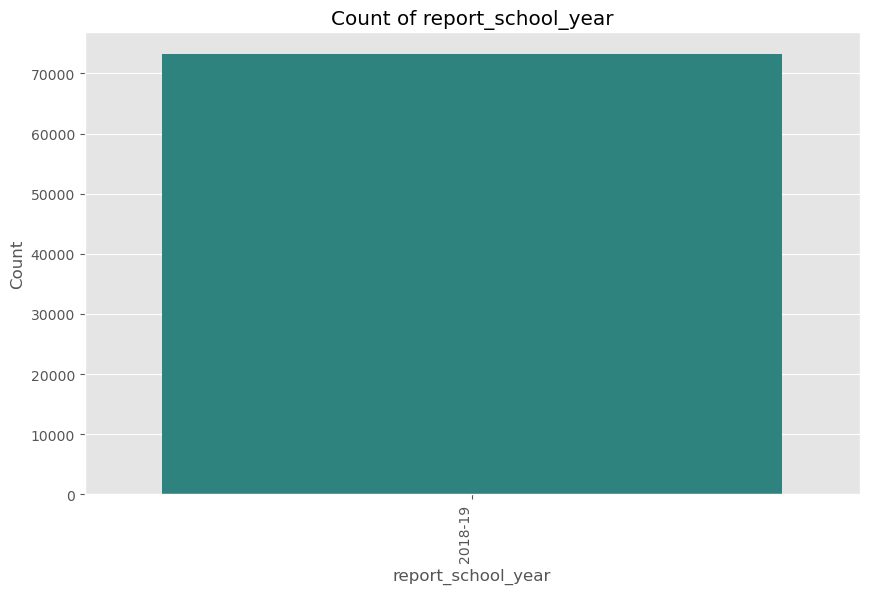


Counts for report_school_year:
2018-19    73152
Name: report_school_year, dtype: int64

Unique for report_school_year:
1


In [25]:

# calling the function
plot_category_counts(df, 'report_school_year')

- As the introduction of the DataFrame indicates, this feature contains only data entries from the year 2018-19.

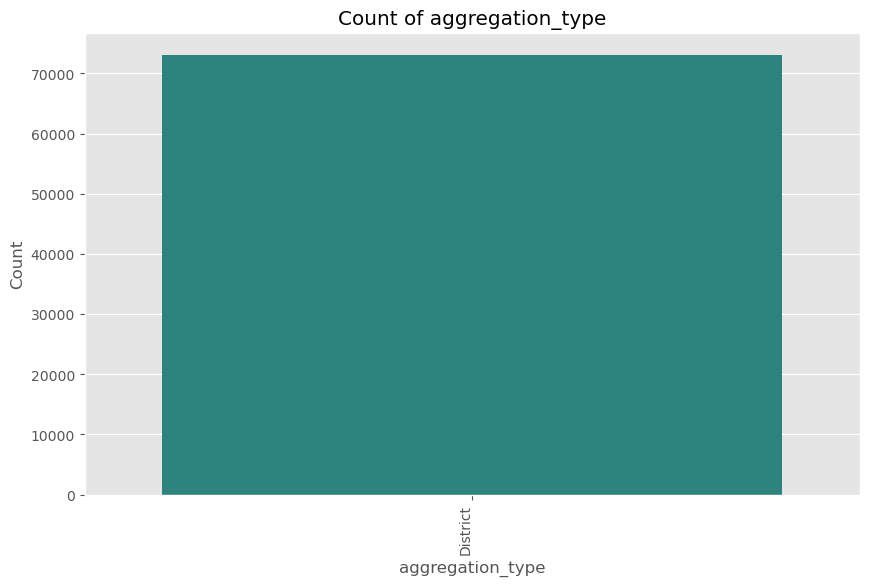


Counts for aggregation_type:
District    73152
Name: aggregation_type, dtype: int64

Unique for aggregation_type:
1


In [26]:
# calling the function
plot_category_counts(df,'aggregation_type')

- It is clear from the above plot that it only has one value that is 'district'

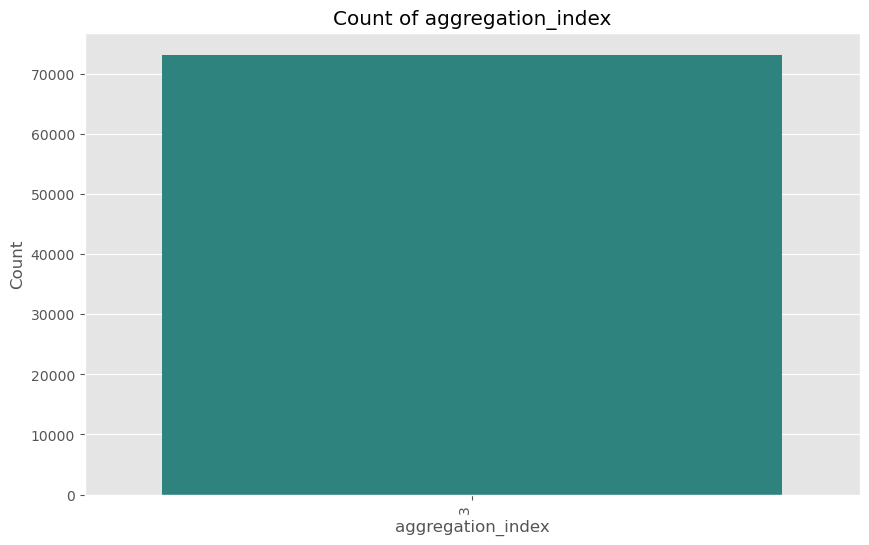


Counts for aggregation_index:
3    73152
Name: aggregation_index, dtype: int64

Unique for aggregation_index:
1


In [27]:
# calling the function
plot_category_counts(df,'aggregation_index')

- It is clear from the above plot that it only has one value that is '3'

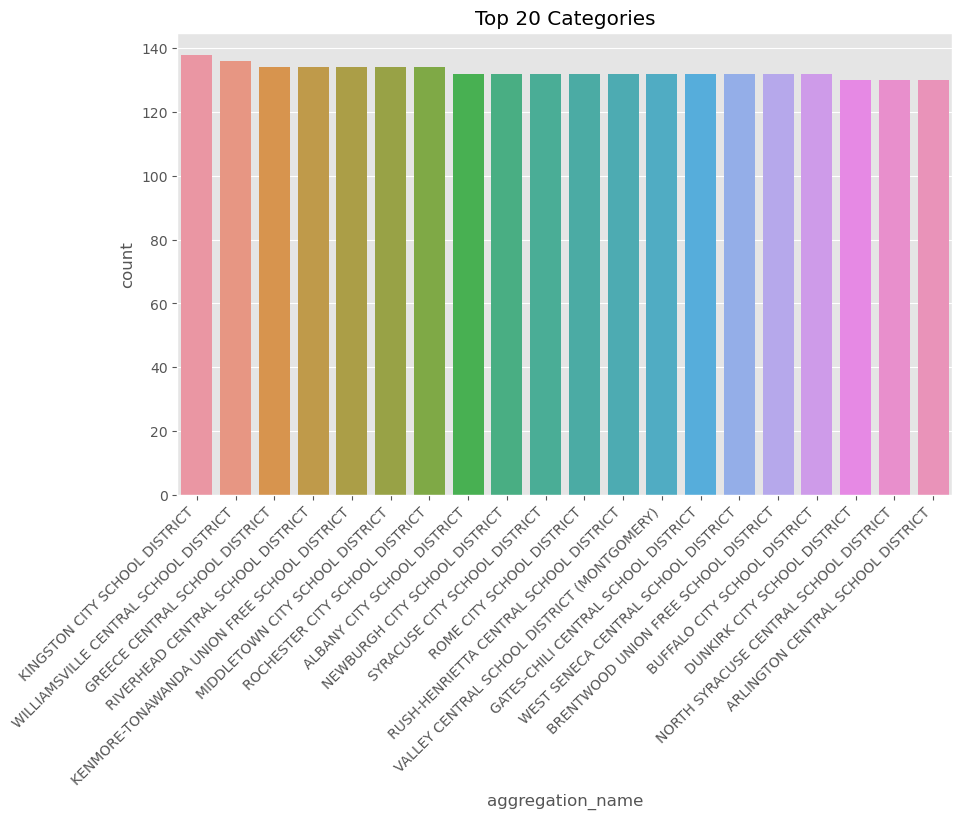

count                             73152
unique                              680
top       KINGSTON CITY SCHOOL DISTRICT
freq                                138
Name: aggregation_name, dtype: object

In [28]:
# Getting  the top 20 values and their counts
top_20 = df['aggregation_name'].value_counts().nlargest(20)

# plotting  the count plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(data=df, x='aggregation_name', order=top_20.index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Categories')
plt.show()

# summary  statistics
display(df['aggregation_name'].describe())

- As the summary statistics indicate, there are 680 unique values, but for a better view, we have taken only the top 20 values. In this case, Kingston City School has the highest count.


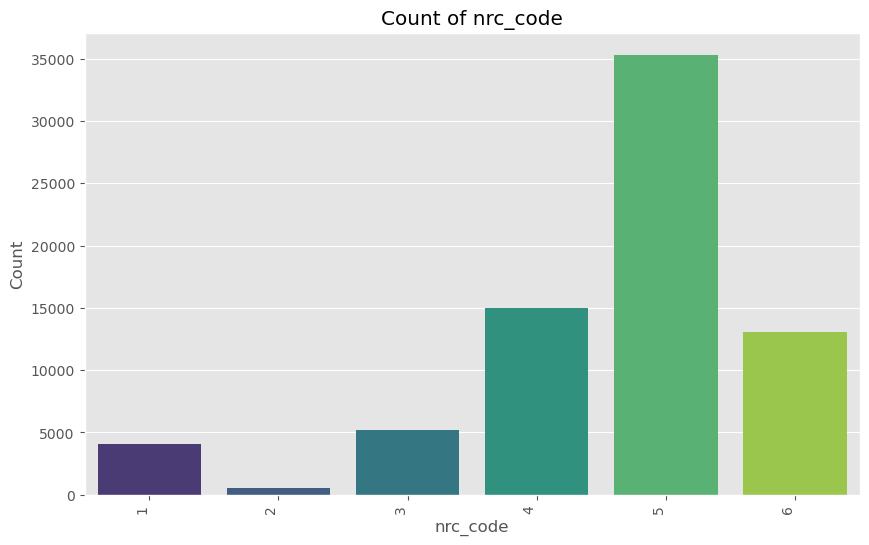


Counts for nrc_code:
5    35322
4    14968
6    13068
3     5228
1     4042
2      524
Name: nrc_code, dtype: int64

Unique for nrc_code:
6


In [29]:
# calling the function
plot_category_counts(df,'nrc_code')

- This is an indicator for the type of school district, which shows that indicator 5 has the highest count, followed by 4 and 6 in the second and third positions.


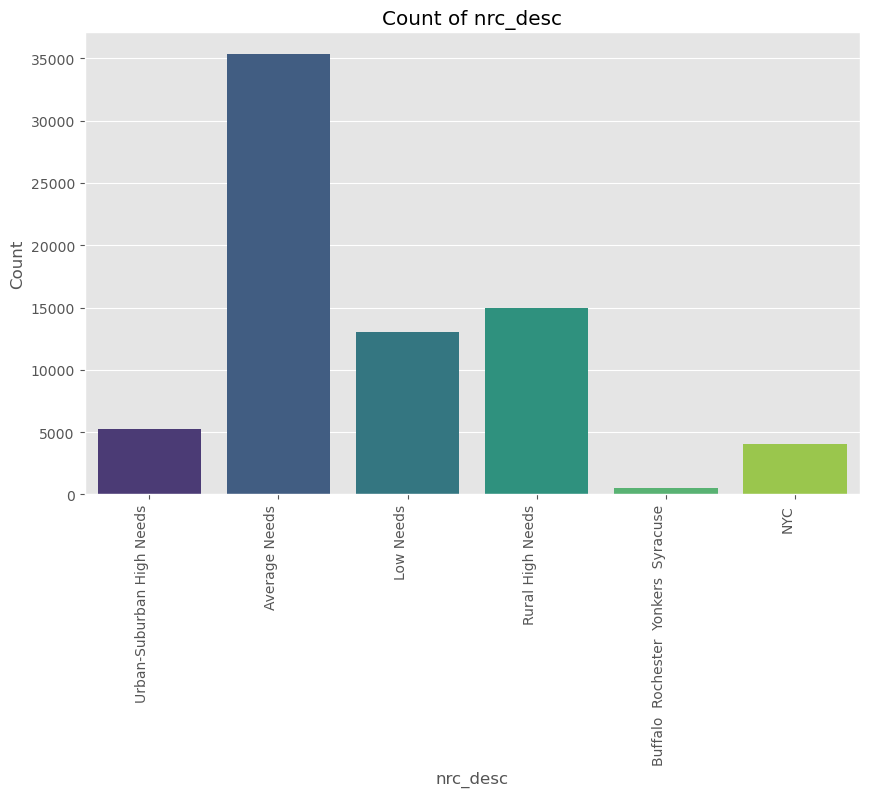


Counts for nrc_desc:
Average Needs                            35322
Rural High Needs                         14968
Low Needs                                13068
Urban-Suburban High Needs                 5228
NYC                                       4042
Buffalo  Rochester  Yonkers  Syracuse      524
Name: nrc_desc, dtype: int64

Unique for nrc_desc:
6


In [30]:
# calling the function
plot_category_counts(df,'nrc_desc')

- We can observe that 'Average Needs' has the highest count, followed by 'Rural High Needs' with the second highest count, and 'Low Needs' in third place


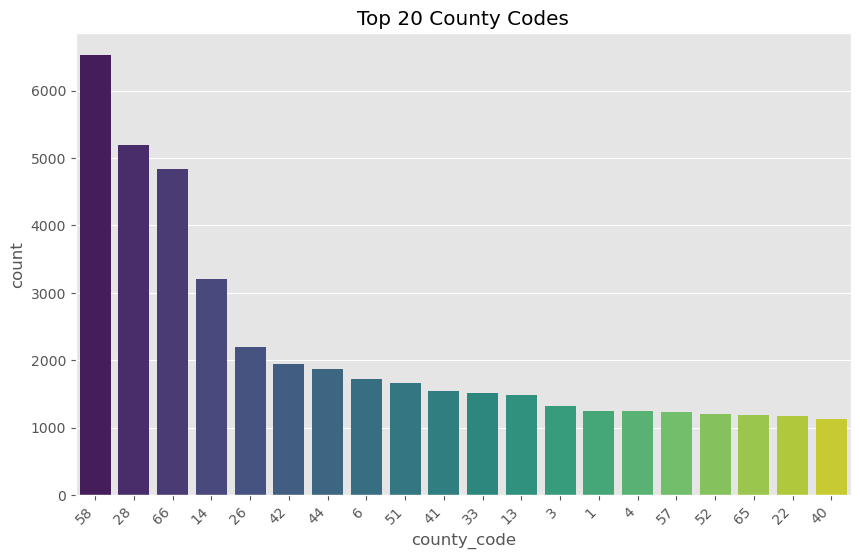

count     73152
unique       62
top          58
freq       6526
Name: county_code, dtype: int64

In [31]:
# Top 20 for county_code
top_20_county_code = df['county_code'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='county_code', order=top_20_county_code.index, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 County Codes')

# Display plot 
plt.show()

# Summary statistics for county_code
display(df['county_code'].describe())


- We have plotted only the top 20 values from county_code In the county_code, the top 3 highest counts consist of '58', '28', and '66'.


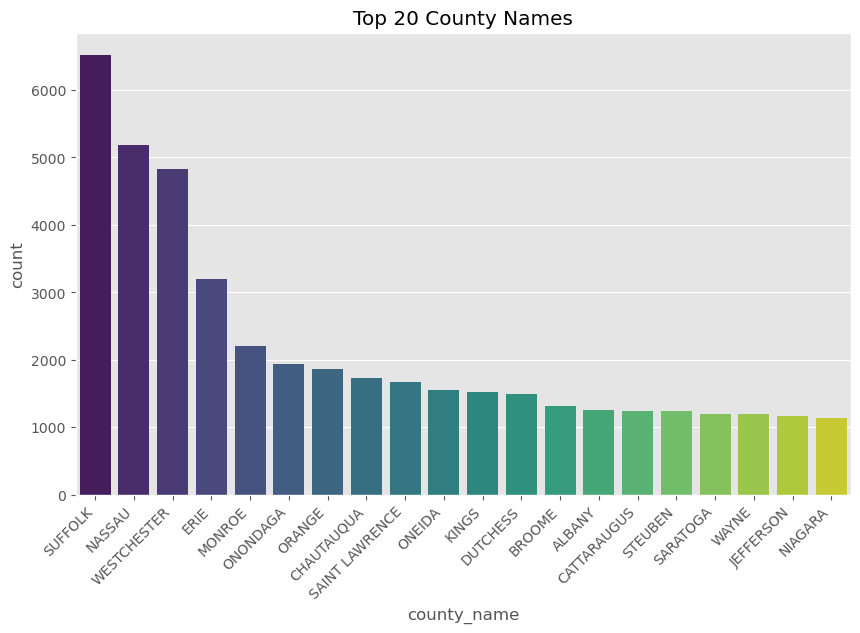

count       73152
unique         62
top       SUFFOLK
freq         6526
Name: county_name, dtype: object

In [32]:
# Top 20 for county_name
top_20_county_name = df['county_name'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))  


sns.countplot(data=df, x='county_name', order=top_20_county_name.index, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 County Names')

# Display plot
plt.show()

# Summary statistics for county_name
display(df['county_name'].describe())

- We have plotted only the top 20 values from county_name. Looking at th county_name,Suffolk county has the highest count folowed by Nassau and Westchester in 2nd and 3rd position.

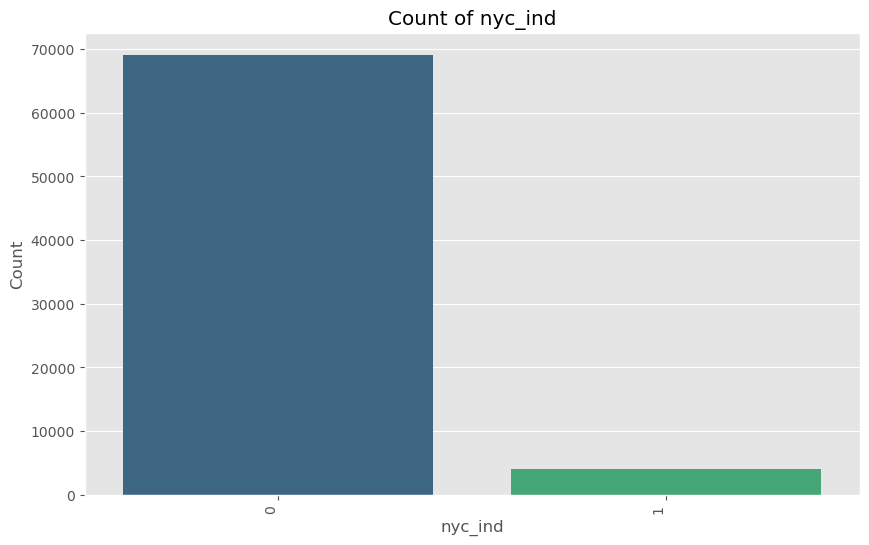


Counts for nyc_ind:
0    69110
1     4042
Name: nyc_ind, dtype: int64

Unique for nyc_ind:
2


In [33]:
# calling the function
plot_category_counts(df,'nyc_ind')

- This shows that the number of zeros is higher compared to ones, which indicates that the majority of the school district resides outside the borders of NYC.

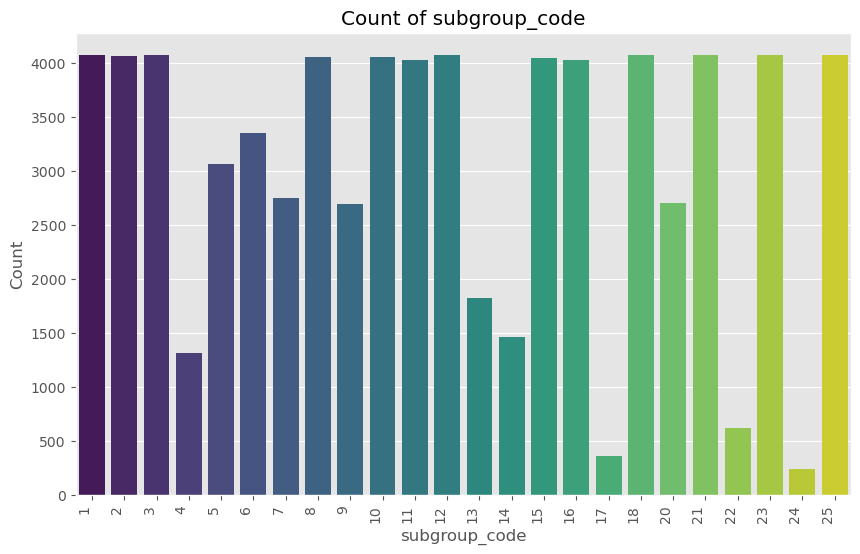


Counts for subgroup_code:
1     4074
25    4074
21    4074
18    4074
23    4070
12    4068
3     4068
2     4060
10    4056
8     4050
15    4046
11    4028
16    4028
6     3352
5     3066
7     2752
20    2702
9     2690
13    1824
14    1464
4     1312
22     616
17     362
24     242
Name: subgroup_code, dtype: int64

Unique for subgroup_code:
24


In [34]:
# calling the function
plot_category_counts(df,'subgroup_code')

- This shows that the subgroup consists of 24 unique values, with codes 1 to 18 having the highest counts, while codes such as 22, 17, and 24 have the lowest counts.


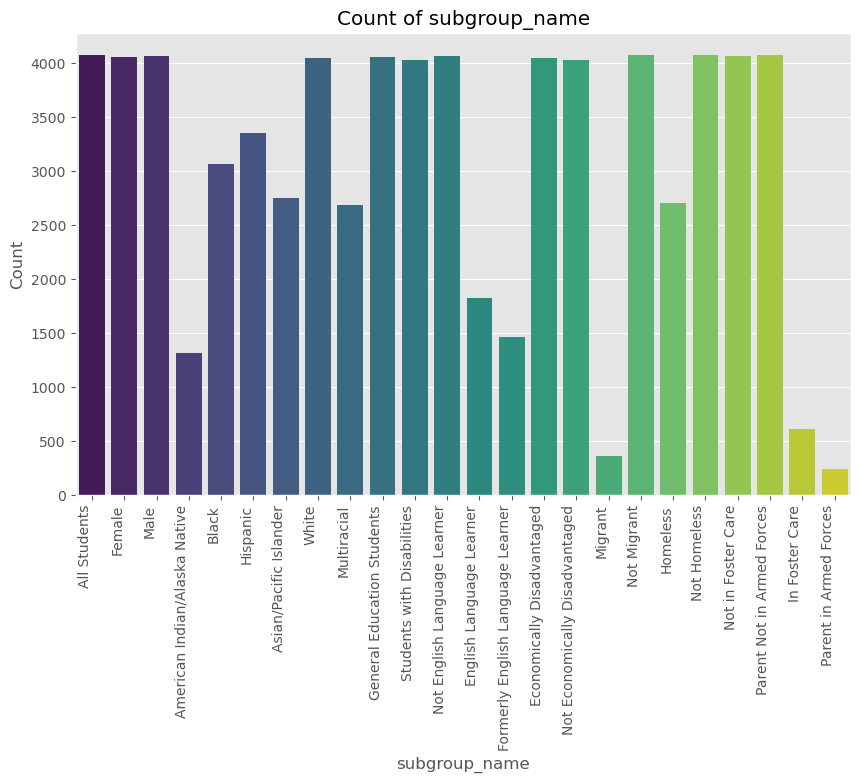


Counts for subgroup_name:
All Students                         4074
Parent Not in Armed Forces           4074
Not Homeless                         4074
Not Migrant                          4074
Not in Foster Care                   4070
Not English Language Learner         4068
Male                                 4068
Female                               4060
General Education Students           4056
White                                4050
Economically Disadvantaged           4046
Students with Disabilities           4028
Not Economically Disadvantaged       4028
Hispanic                             3352
Black                                3066
Asian/Pacific Islander               2752
Homeless                             2702
Multiracial                          2690
English Language Learner             1824
Formerly English Language Learner    1464
American Indian/Alaska Native        1312
In Foster Care                        616
Migrant                               362
Parent 

In [35]:
# calling the function
plot_category_counts(df,'subgroup_name')

- We can observe subgroup names such as All Students, Parent Not in Armed Forces, Not Homeless have the highest counts, whereas groups such as In Foster Care, Migrant, and Parent in Armed Forces have the lowest counts.

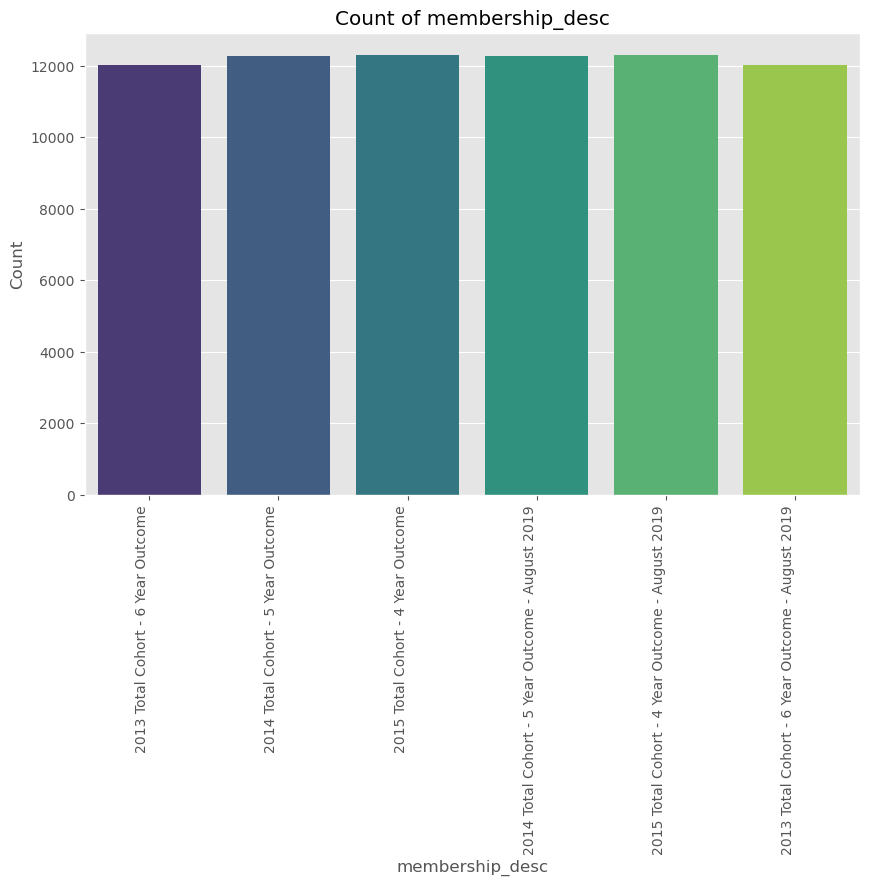


Counts for membership_desc:
2015 Total Cohort - 4 Year Outcome                  12299
2015 Total Cohort - 4 Year Outcome - August 2019    12299
2014 Total Cohort - 5 Year Outcome                  12257
2014 Total Cohort - 5 Year Outcome - August 2019    12257
2013 Total Cohort - 6 Year Outcome                  12020
2013 Total Cohort - 6 Year Outcome - August 2019    12020
Name: membership_desc, dtype: int64

Unique for membership_desc:
6


In [36]:
# calling the function
plot_category_counts(df,'membership_desc')

- The membership_desc feature represents school year in which students first enrolled in High School it includes six unique values tracked over four, five, and six years. Counts are consistent across the entries , such as 2015 Total Cohort - 4 Year Outcome and 2015 Total Cohort - 4 Year Outcome - August 2019, both with 12,299.

----

<b> [Back to Content](#Content) </b>

### 3.3 Bivariate Analysis

In [37]:
# Code to select only numerical columns from dataset.

numerical_data = df.select_dtypes(include=['number'])

numerical_data

enroll_cnt  grad_cnt  grad_pct  reg_cnt  reg_pct  dropout_cnt  \
0           658.0     464.0      71.0    310.0     47.0        148.0   
1           324.0     246.0      76.0    169.0     52.0         65.0   
2           334.0     218.0      65.0    141.0     42.0         83.0   
3             NaN       NaN       NaN      NaN      NaN          NaN   
4           367.0     248.0      68.0    183.0     50.0         91.0   
...           ...       ...       ...      ...      ...          ...   
73147         NaN       NaN       NaN      NaN      NaN          NaN   
73148         NaN       NaN       NaN      NaN      NaN          NaN   
73149         NaN       NaN       NaN      NaN      NaN          NaN   
73150         NaN       NaN       NaN      NaN      NaN          NaN   
73151         NaN       NaN       NaN      NaN      NaN          NaN   

       dropout_pct  
0             22.0  
1             20.0  
2             25.0  
3              NaN  
4             25.0  
...            ...  
73147          NaN  
73148          NaN  
73149          NaN  
73150          NaN  
73151          NaN  

[73152 rows x 7 columns]

In [38]:
#Code to find correlation between columns.

numerical_data.corr()

enroll_cnt  grad_cnt  grad_pct   reg_cnt   reg_pct  dropout_cnt  \
enroll_cnt     1.000000  0.993603 -0.014102  0.979747  0.046173     0.846691   
grad_cnt       0.993603  1.000000  0.034515  0.971027  0.041879     0.795895   
grad_pct      -0.014102  0.034515  1.000000 -0.021607  0.269922    -0.190834   
reg_cnt        0.979747  0.971027 -0.021607  1.000000  0.139598     0.851021   
reg_pct        0.046173  0.041879  0.269922  0.139598  1.000000     0.070032   
dropout_cnt    0.846691  0.795895 -0.190834  0.851021  0.070032     1.000000   
dropout_pct    0.021982 -0.018238 -0.770431  0.033453 -0.166014     0.230815   

             dropout_pct  
enroll_cnt      0.021982  
grad_cnt       -0.018238  
grad_pct       -0.770431  
reg_cnt         0.033453  
reg_pct        -0.166014  
dropout_cnt     0.230815  
dropout_pct     1.000000

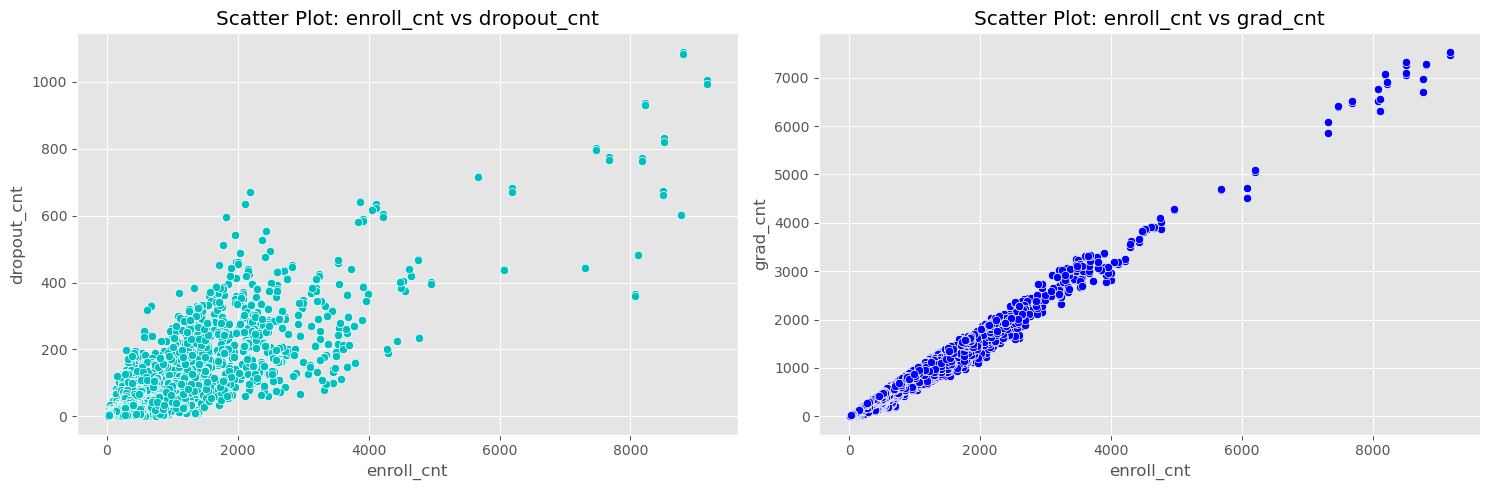

In [39]:
# Plotting scatter plot 

# Create a figure with 1 row and 2 columns for horizontal placement
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  

# First subplot
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=numerical_data, color='c', ax=axes[0])
axes[0].set_title('Scatter Plot: enroll_cnt vs dropout_cnt')

# Second subplot 
sns.scatterplot(x='enroll_cnt', y='grad_cnt', data=numerical_data, color='b', ax=axes[1])
axes[1].set_title('Scatter Plot: enroll_cnt vs grad_cnt')



# Display the plots
plt.tight_layout()
plt.show()

- All the graphs  has strong positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

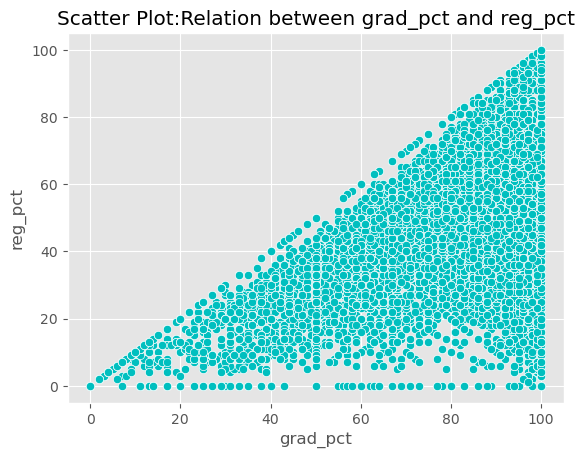

In [40]:
# Plotting Scatterplot  to find the insight 

sns.scatterplot(x='grad_pct', y='reg_pct' ,data=numerical_data, color='c') 
plt.title('Scatter Plot:Relation between grad_pct and reg_pct')
plt.show()

- The graphs  has strong positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

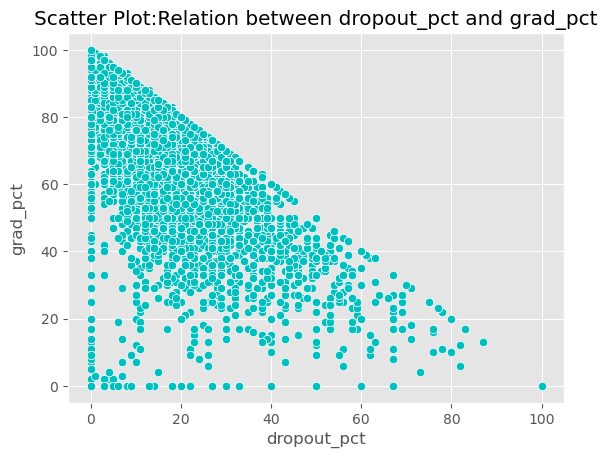

In [41]:
# Plotting Scatterplot  to find the insight 

sns.scatterplot(x='dropout_pct', y='grad_pct' ,data=numerical_data, color='c') 
plt.title('Scatter Plot:Relation between dropout_pct and grad_pct')
plt.show()

- The graphs  has strong negative correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

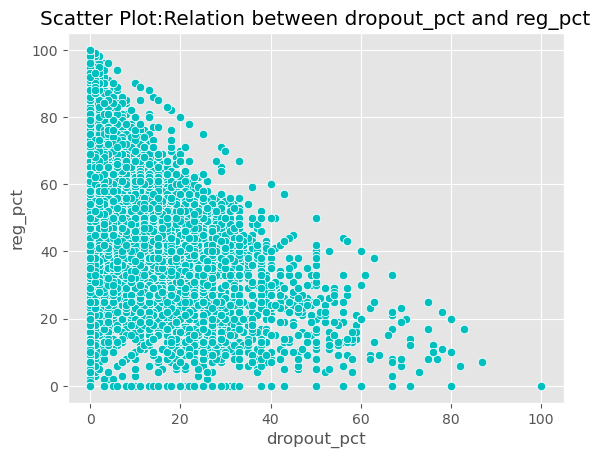

In [42]:
# Plotting Scatterplot  to find the insight 

sns.scatterplot(x='dropout_pct', y='reg_pct' ,data=numerical_data, color='c') 
plt.title('Scatter Plot:Relation between dropout_pct and reg_pct')
plt.show()

- The graphs  has strong negative correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

In [43]:
# Creating the fuction to plot bargraph between Categorical and numerical columns.

def plot_bar(df, x_col, y_col, title="Bar Plot", x_label=None, y_label=None, color='b', size=(10, 6), rotate_xticks=True, xticks_rotation=45):
    
    
    
    # Create the bar plot
    plt.figure(figsize=size)
    sns.barplot(x=x_col, y=y_col, data=df, color=color)

    # Set the title and axis labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_label if x_label else x_col, fontsize=14)
    plt.ylabel(y_label if y_label else y_col, fontsize=14)
    
# Optionally rotate x-axis labels
# It helps to Adjust the columns in corrected horizontal way. 
    if rotate_xticks:
        plt.xticks(rotation=45, ha='right')
    
# Display the plot
    plt.tight_layout()
    plt.show()



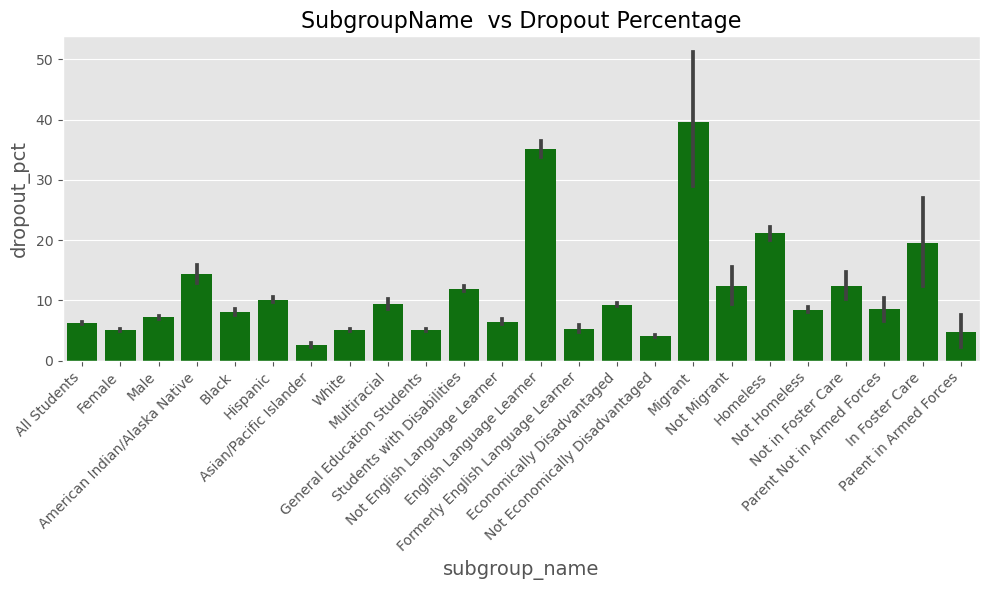

In [44]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'dropout_pct', title="SubgroupName  vs Dropout Percentage", x_label="subgroup_name", y_label="dropout_pct", color='g')



- Enrolled students of the 'Migrant' discontinued their high school enrollment during the school year has most number of dropout count

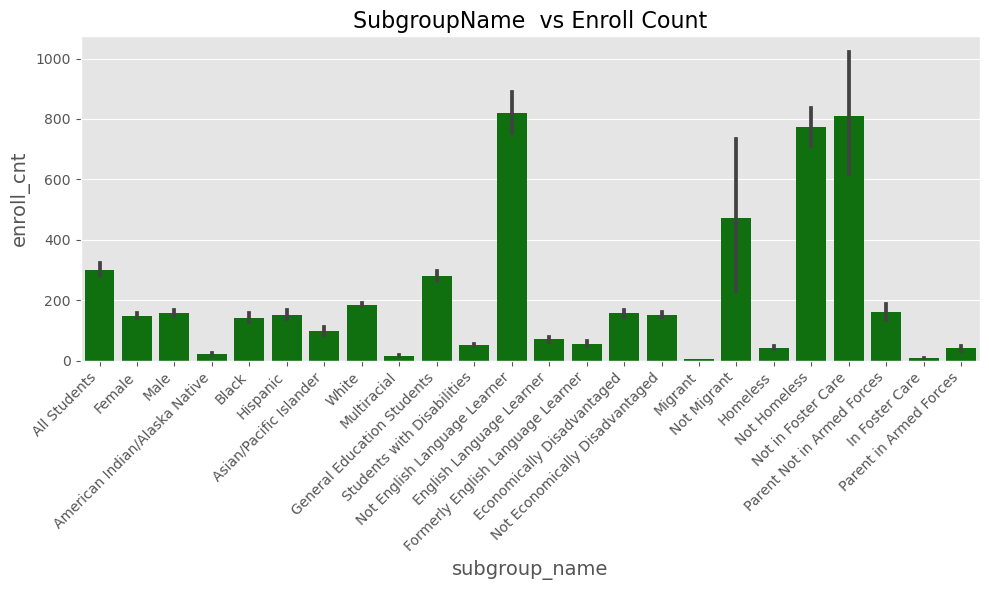

In [45]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'enroll_cnt', title="SubgroupName  vs Enroll Count", x_label="subgroup_name", y_label="enroll_cnt", color='g')



- Students of the 'Not English Language learner'  has most number of enrollment  .

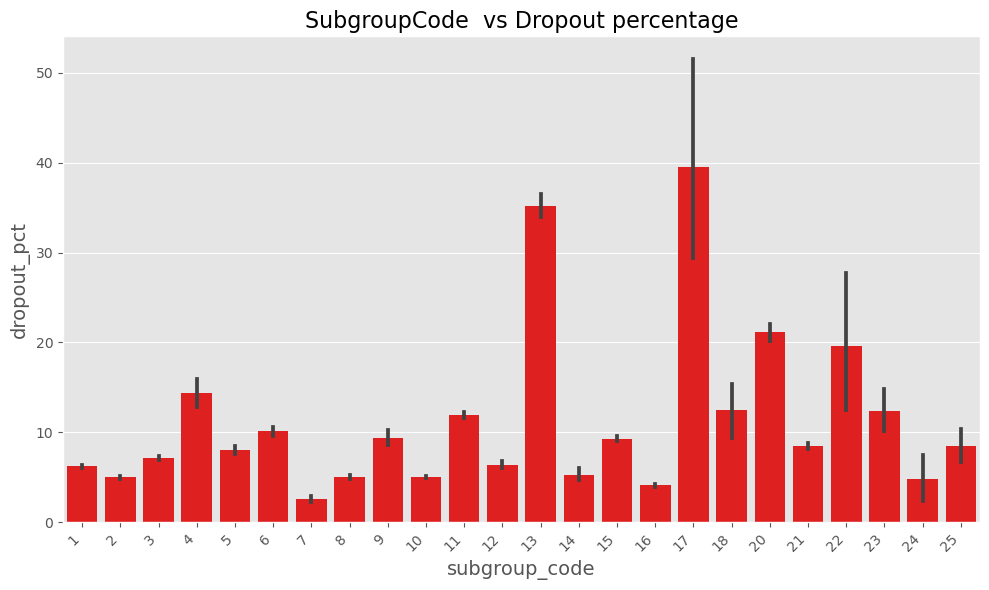

In [46]:
#Calling the function to plot bargraph


plot_bar(df, 'subgroup_code', 'dropout_pct', title="SubgroupCode  vs Dropout percentage", x_label="subgroup_code", y_label="dropout_pct", color='r')



- Enrolled students of the Subgroup '17' discontinued their high school enrollment during the school year has the highest number.

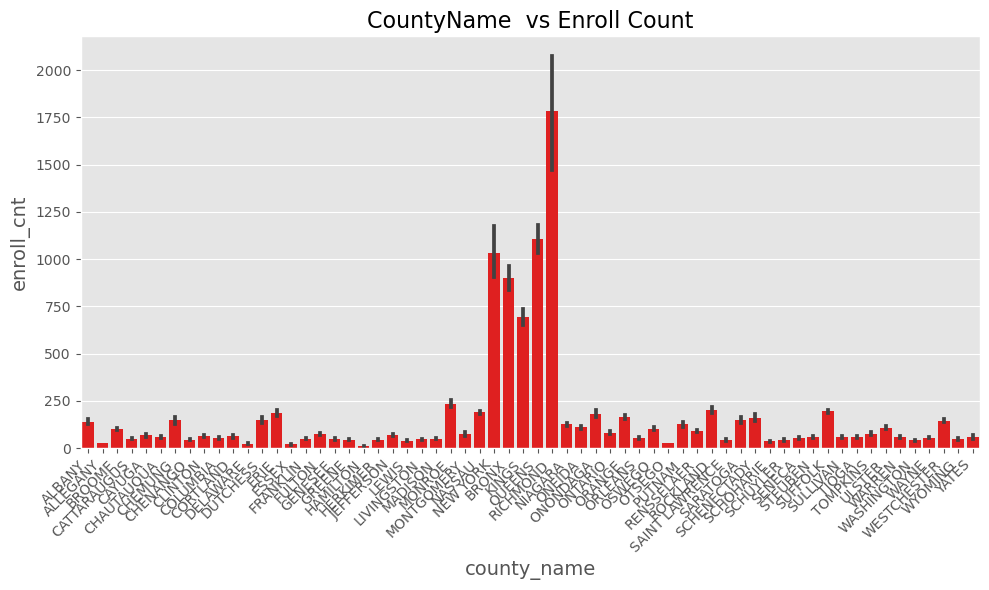

In [47]:
#Calling the function to plot bargraph

plot_bar(df, 'county_name', 'enroll_cnt', title="CountyName  vs Enroll Count", x_label="county_name", y_label="enroll_cnt", color='r')



- Students of the CountyName='Richmond' has most number of enrollment .

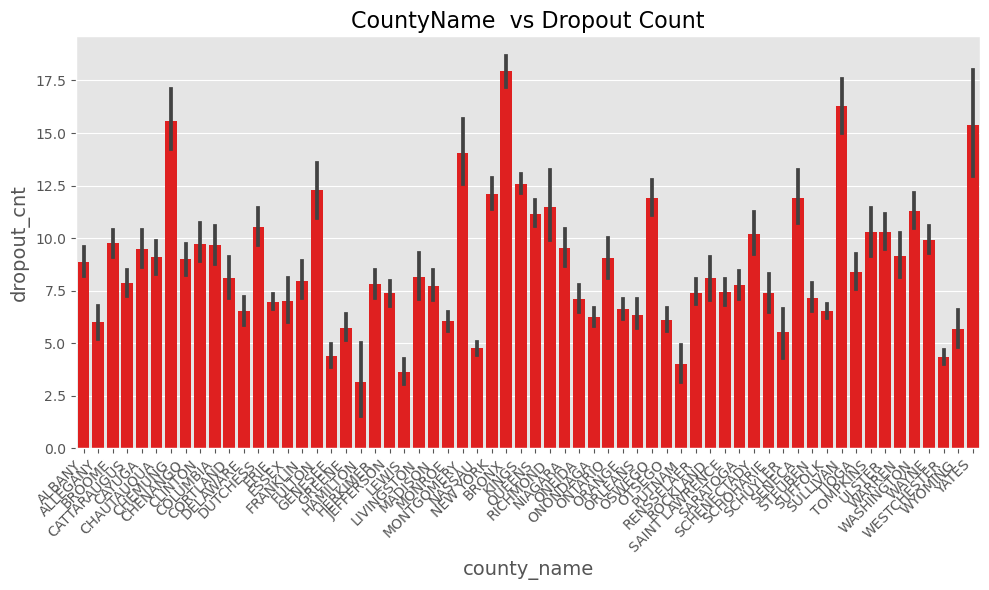

In [48]:
#Calling the function to plot bargraph

plot_bar(df, 'county_name', 'dropout_pct', title="CountyName  vs Dropout Count", x_label="county_name", y_label="dropout_cnt", color='r')



- CountyName='Bronx' has the most number of dropout count .

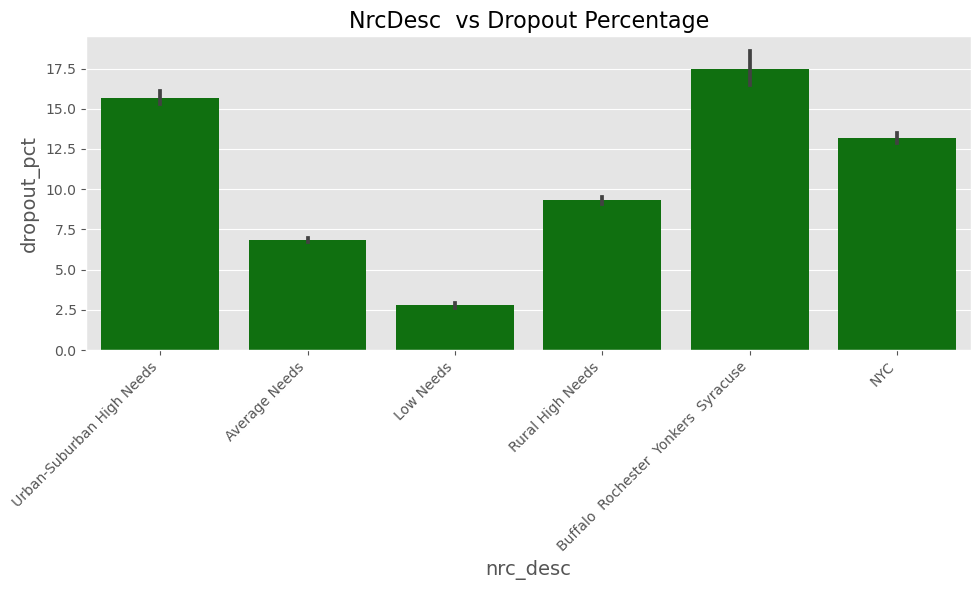

In [49]:
#Calling the function to plot bargraph

plot_bar(df, 'nrc_desc', 'dropout_pct', title="NrcDesc  vs Dropout Percentage", x_label="nrc_desc", y_label="dropout_pct", color='g')



- School district 'Buffalo Rochester Yonkers Syracuse' has the most number of dropout count . 

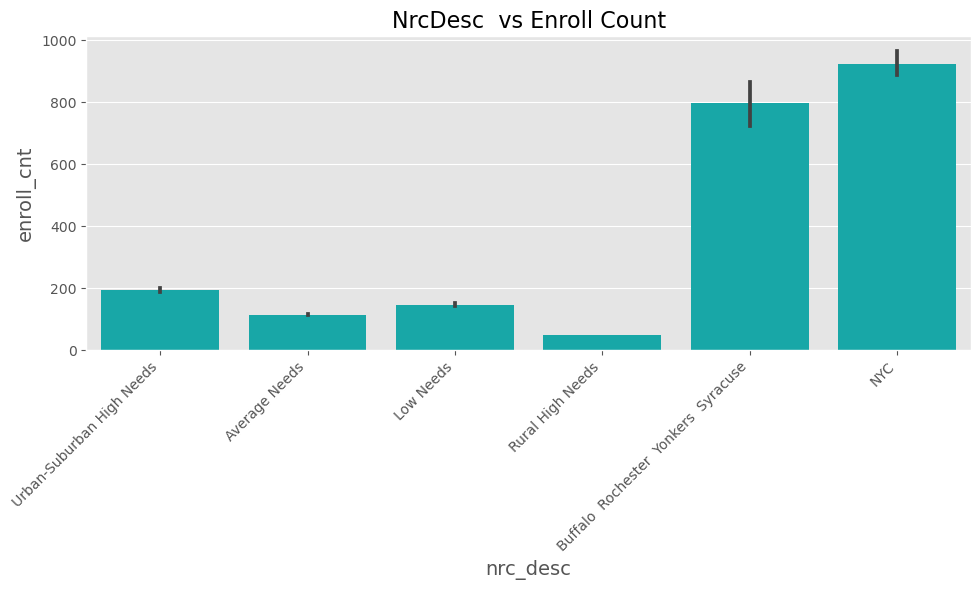

In [50]:
#Calling the function to plot bargraph

plot_bar(df, 'nrc_desc', 'enroll_cnt', title="NrcDesc  vs Enroll Count", x_label="nrc_desc", y_label="enroll_cnt", color='c')



- School district 'NYC' has the most number of Enrollment count . 

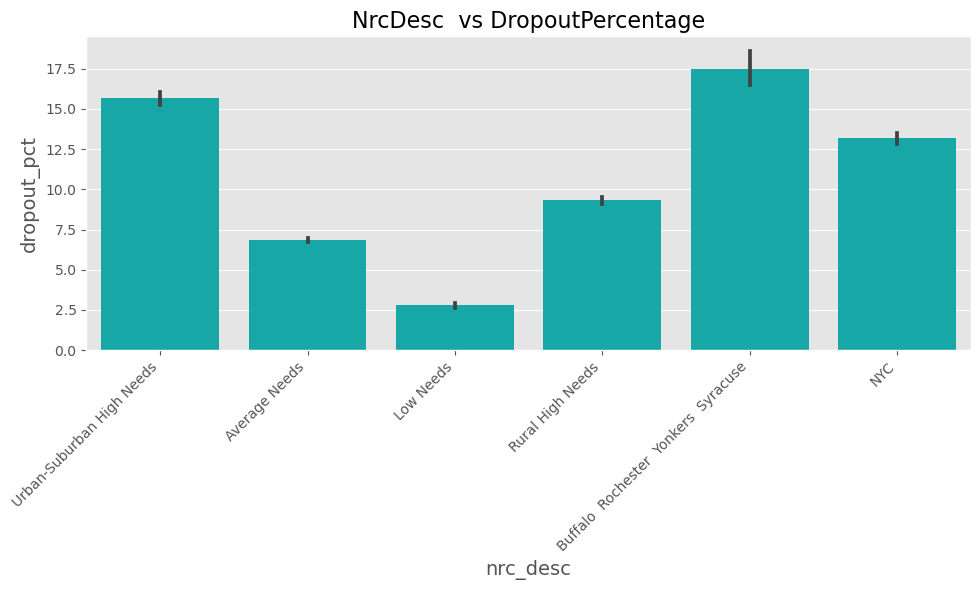

In [51]:
#Calling the function to plot bargraph

plot_bar(df, 'nrc_desc', 'dropout_pct', title="NrcDesc  vs DropoutPercentage", x_label="nrc_desc", y_label="dropout_pct", color='c')



- Percentage of enrolled students of the Buffalo Rochester Yonkers Syracuse district droppedout their high school enrollment during the school year

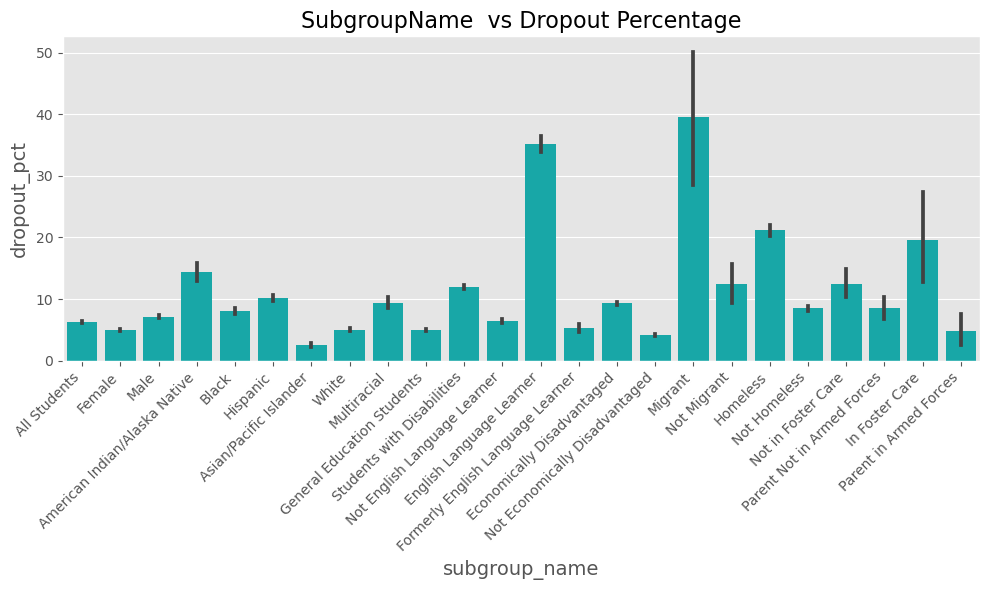

In [52]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'dropout_pct', title="SubgroupName  vs Dropout Percentage", x_label="subgroup_name", y_label="dropout_pct", color='c')



- Percentage of enrolled students of the Migrant subgroup_name droppedout their high school enrollment during the school year

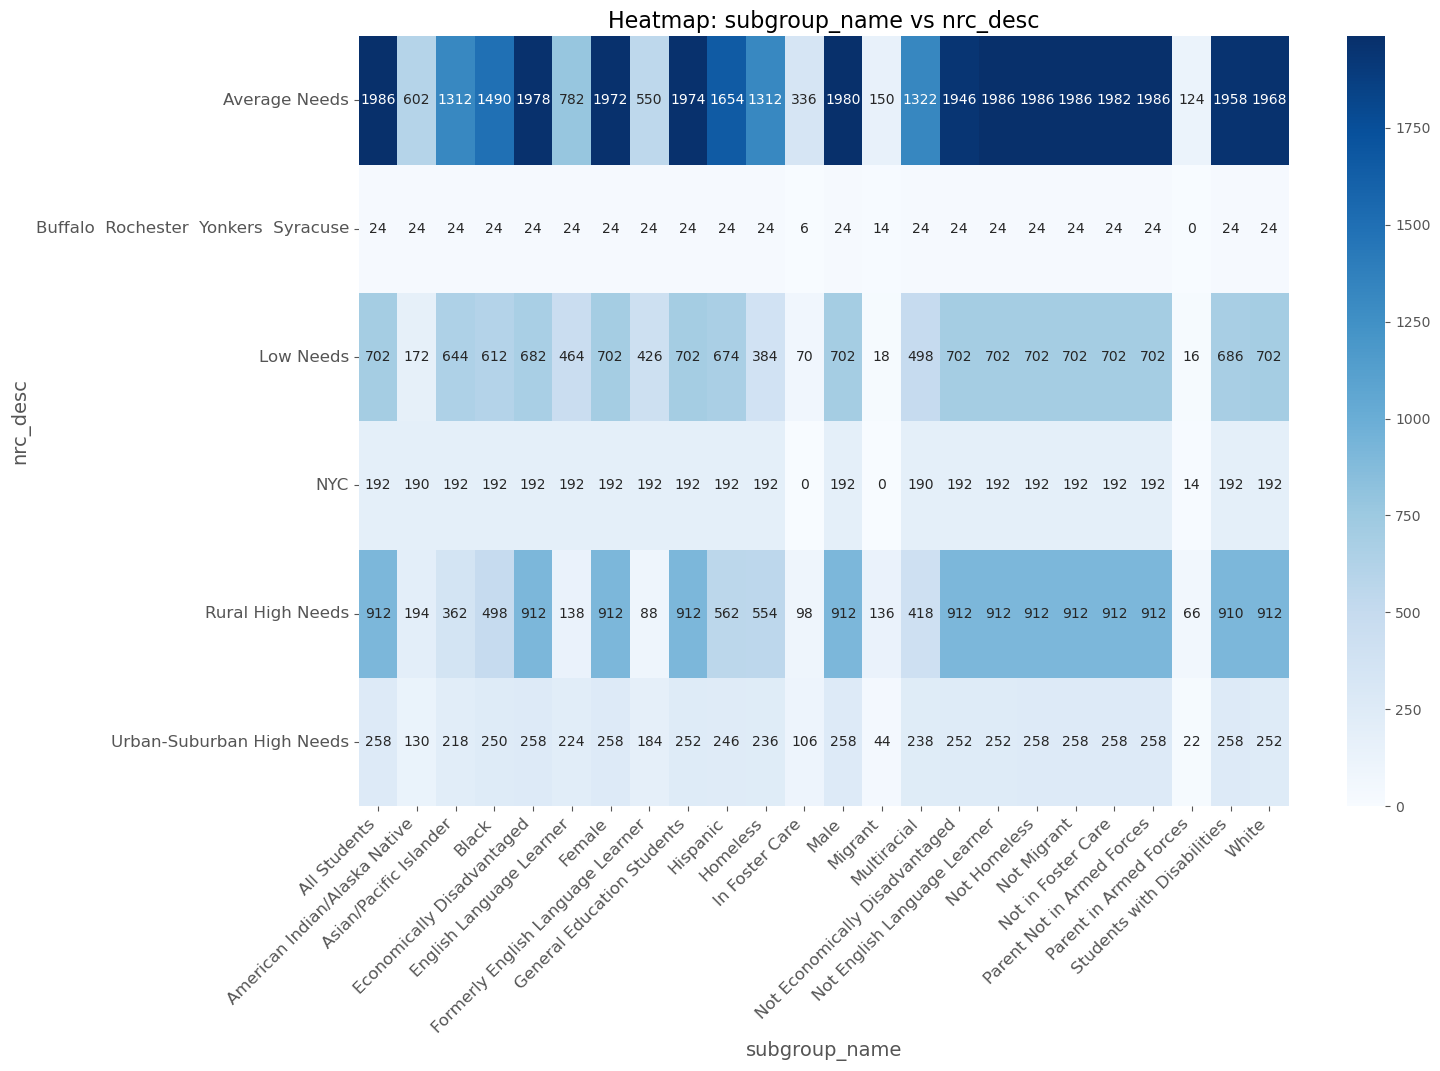

In [53]:
# Create a pivot table for the heatmap
#Pivot table arrange the data in 2d format for easy visualization in heatmap.
pivot_table = df.pivot_table(index='nrc_desc', columns='subgroup_name', aggfunc='size', fill_value=0)

# Increase figure size
plt.figure(figsize=(15, 10)) 

# Plot the heatmap
# Use fmt='d' for integer formatting
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt='d') 

plt.title('Heatmap: subgroup_name vs nrc_desc', fontsize=16) 
plt.xlabel('subgroup_name', fontsize=14)  
plt.ylabel('nrc_desc', fontsize=14)  
plt.xticks(rotation=45, ha='right',fontsize=12)  # Rotate x-ticks for better readability
plt.yticks(fontsize=12)  
plt.show()

- School district Description 'Average Needs' has most number of positive correlation with different subgroup.

- Examples: Average Needs and All students , Average Needs and Not Migrant , Average Needs and Not Homeless.

- The blocks which is darkest in colour has the strongest positive correlation

----

<b> [Back to Content](#Content) </b>

### 3.4 Multivariate Analysis

In [54]:
# Defining variables for multivariate analysis.

column1 = ['enroll_cnt', 'grad_cnt',   'reg_cnt', 'dropout_cnt']

column2 = ['grad_pct', 'reg_pct', 'dropout_pct']

columns = ['enroll_cnt', 'grad_cnt', 'grad_pct','reg_cnt','reg_pct','dropout_cnt','dropout_pct']

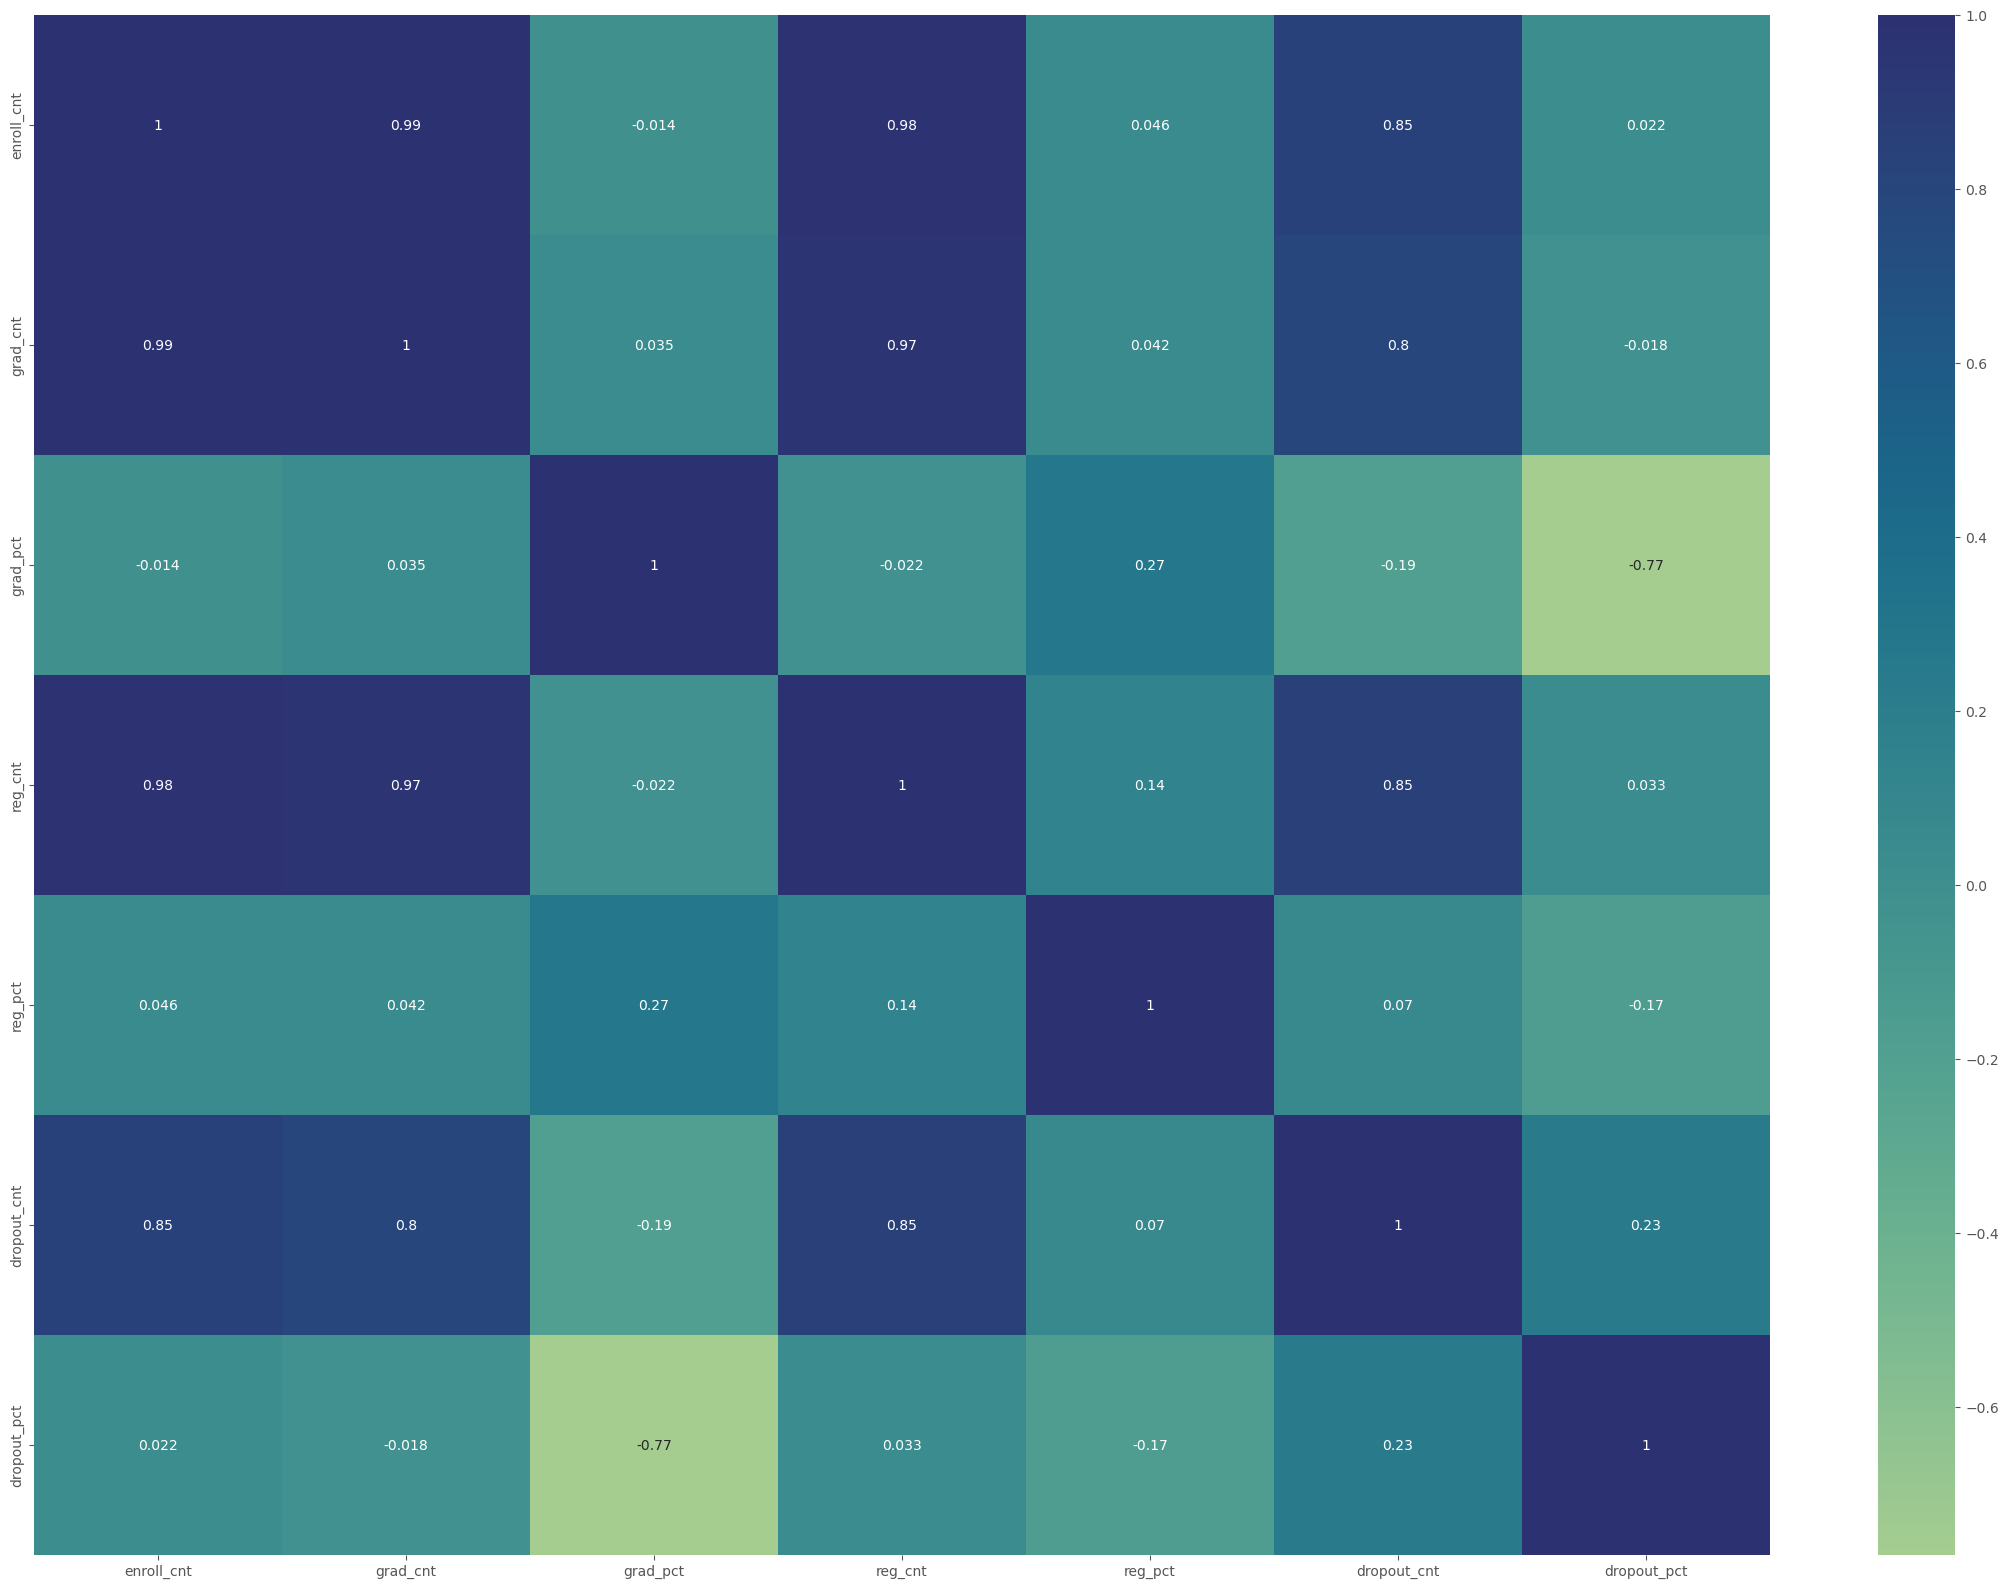

In [55]:
# Heatmap to show correlations between all numeric values. 

plt.figure(figsize=(28,20))

sns.heatmap(df[columns].corr(), annot=True, cmap='crest')
plt.show()

- Here we can see that all numerical attributes with suffix **'_cnt'** are making stronger correlations than the attributes with suffix **'_pct'**. So, we can check both separately.

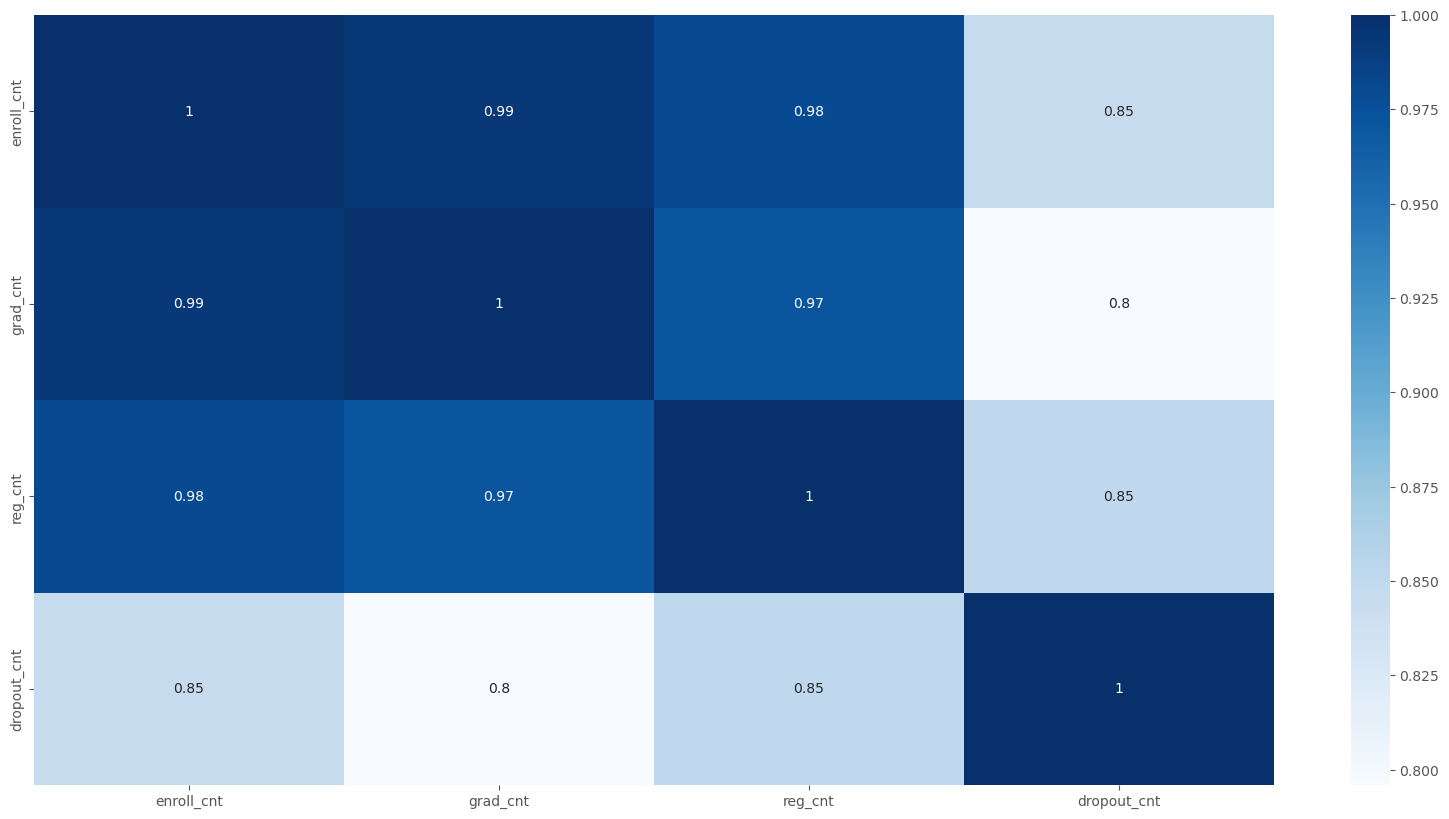

In [56]:
# Heatmap to show correlations between all numeric values with suffix '_cnt'. 

plt.figure(figsize=(20,10))

sns.heatmap(df[column1].corr(), annot=True, cmap='Blues')
plt.show()

- Yes, here most of the attributes are making a strong correlations, where :-
- enroll_cnt has very high correlation with grad_cnt & reg_cnt.

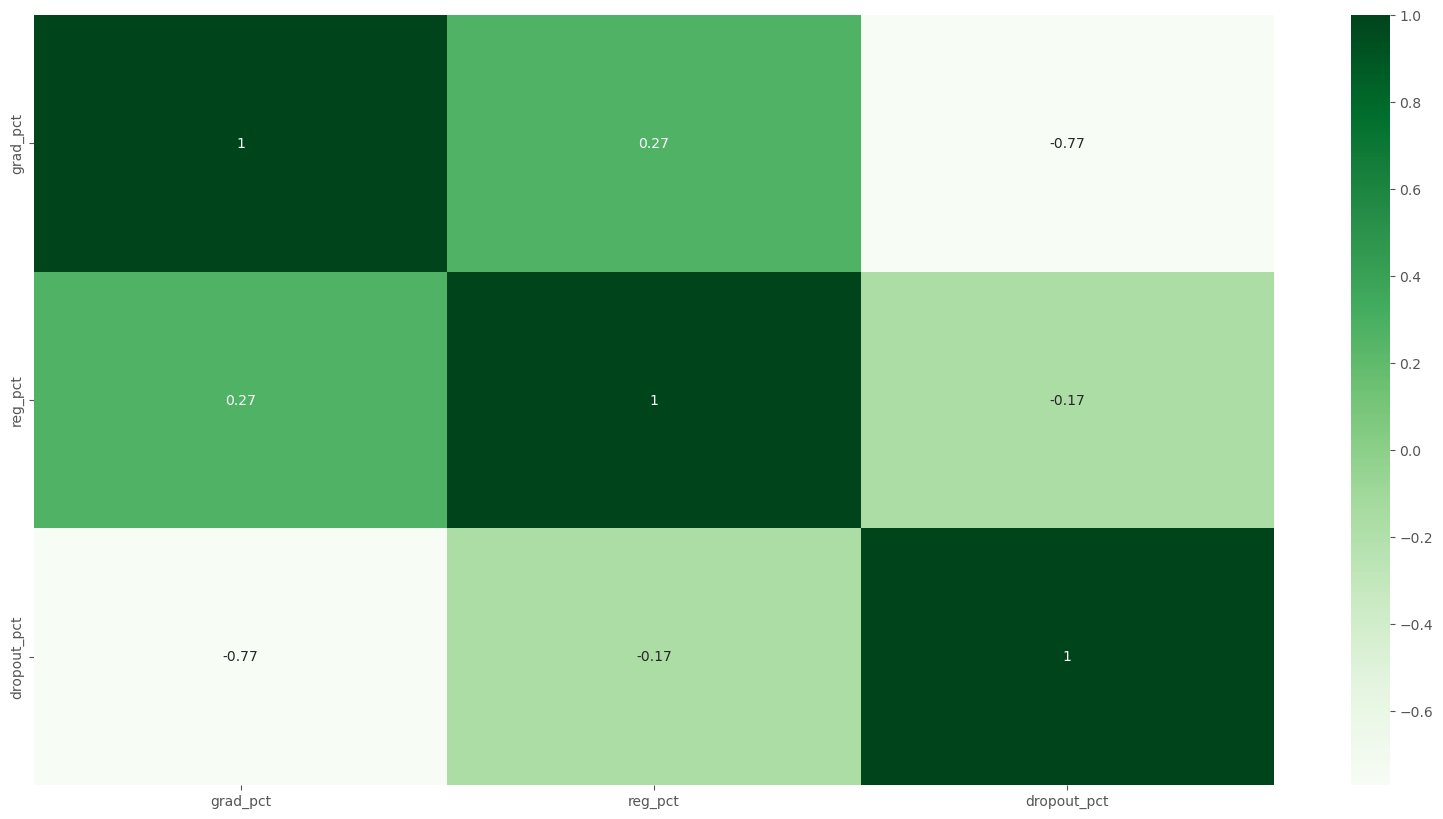

In [57]:
# Heatmap to show correlations between all numeric values with suffix '_pct'. 

plt.figure(figsize=(20,10))

sns.heatmap(df[column2].corr(), annot=True, cmap='Greens')
plt.show()

- Yes, here most of the attributes are making a less correlations.

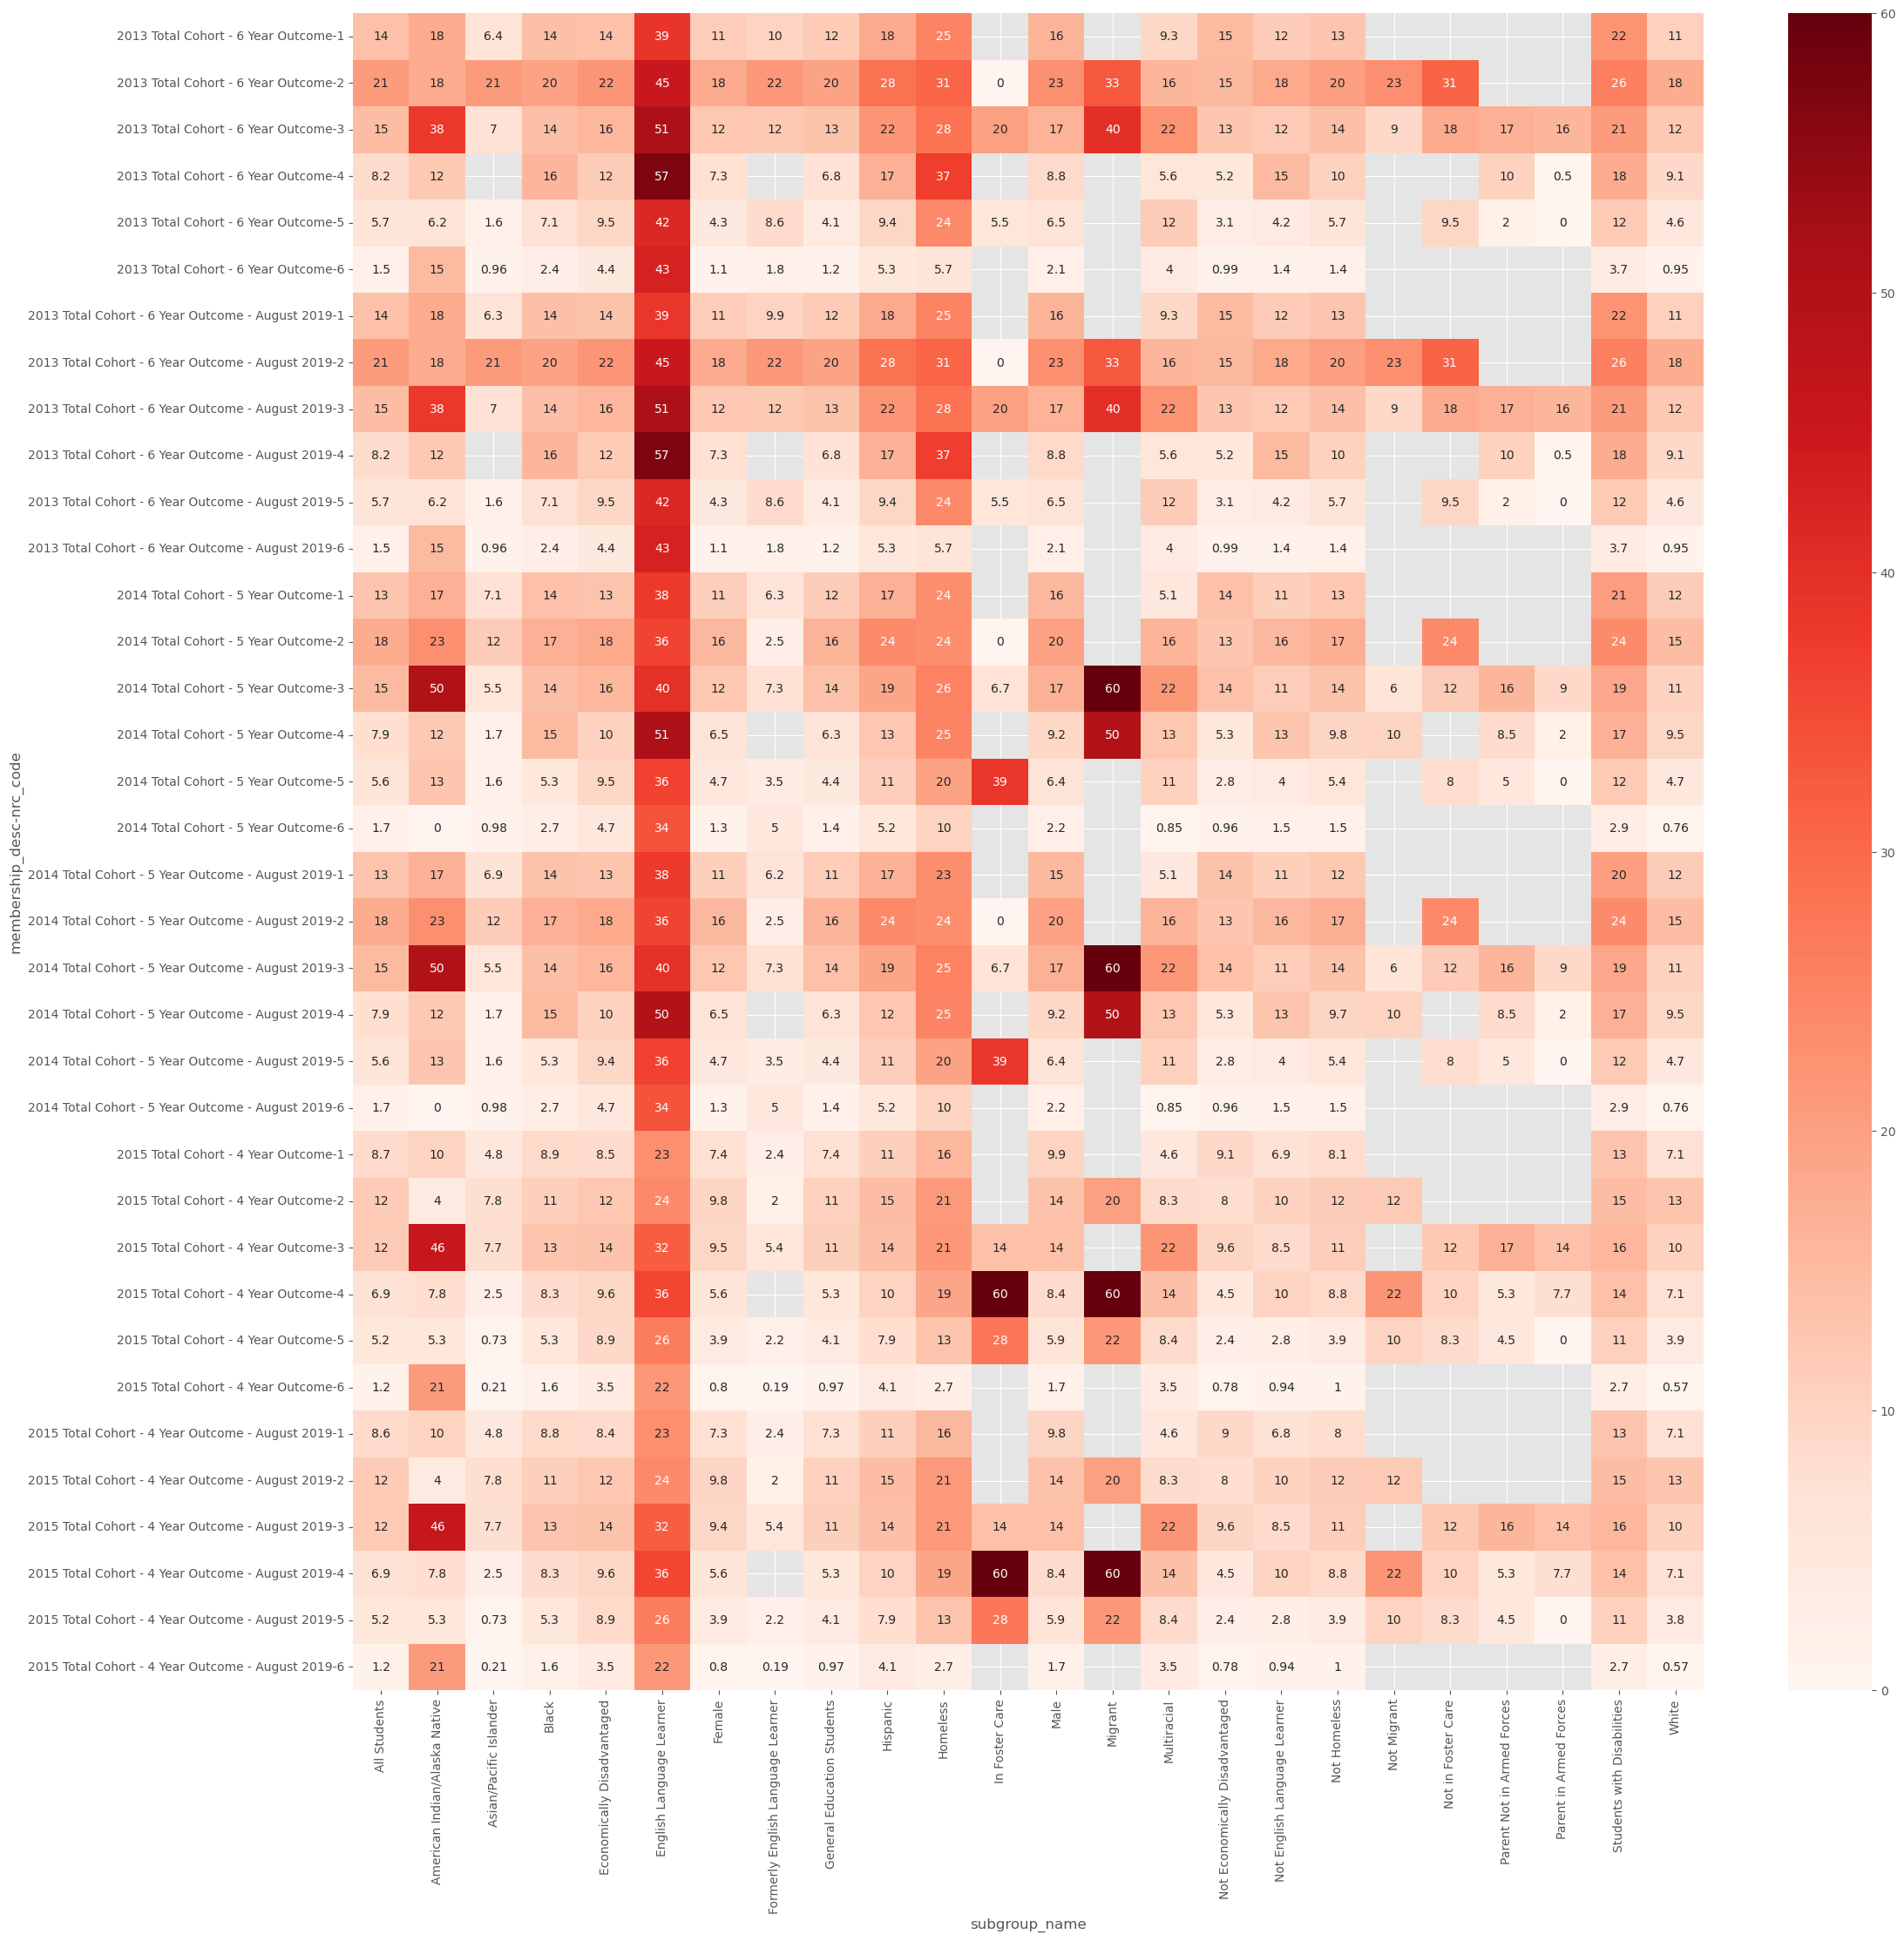

In [58]:
# Heatmap for 'membership_desc', 'nrc_code', 'subgroup_name' with respect to   variable 'dropout_cnt'
plt.figure(figsize=(25,25))
sns.heatmap(df.groupby(['membership_desc', 'nrc_code', 'subgroup_name'])['dropout_pct'].mean().
            unstack(), cmap='Reds', annot=True)
plt.show()

- Here from the above analysis using groupby function, we can conclude the following insights :-

- '2013 Total Cohort' with 'nrc_code - 2' have very high correlation with 'Not in Foster Care'.

- __Note__ - Grey cells with no values are the null values because it does not have any type of correlations.

----

<b> [Back to Content](#Content) </b>

## 4. Data Cleaning

In [59]:
# Check for missing values in each columns.

df.isnull().sum()

report_school_year        0
aggregation_index         0
aggregation_type          0
aggregation_name          0
nrc_code                  0
nrc_desc                  0
county_code               0
county_name               0
nyc_ind                   0
membership_desc           0
subgroup_code             0
subgroup_name             0
enroll_cnt            33478
grad_cnt              33478
grad_pct              33478
reg_cnt               33478
reg_pct               33478
dropout_cnt           33478
dropout_pct           33478
dtype: int64

- null values are present

- As there are same number of missing values in each columns, we will use missingno library and see if there is a pattern to the missing data.

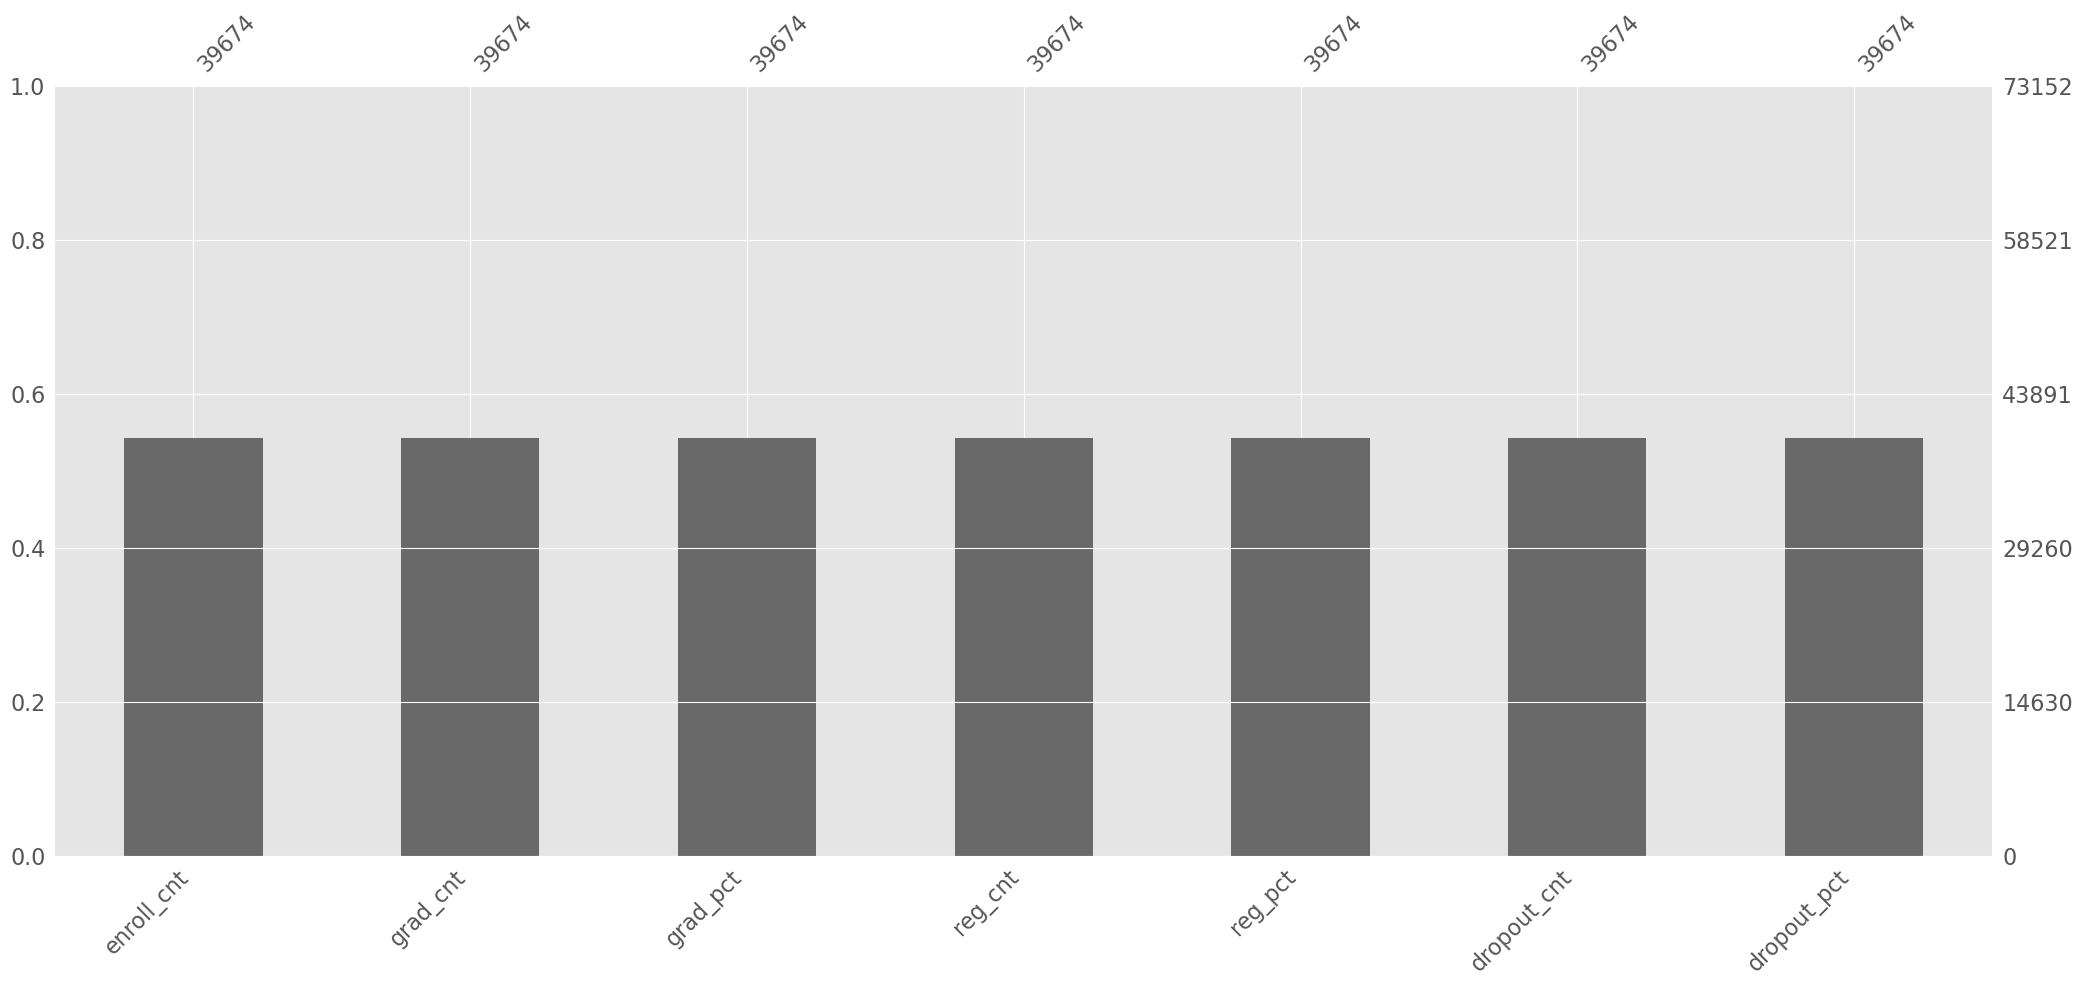

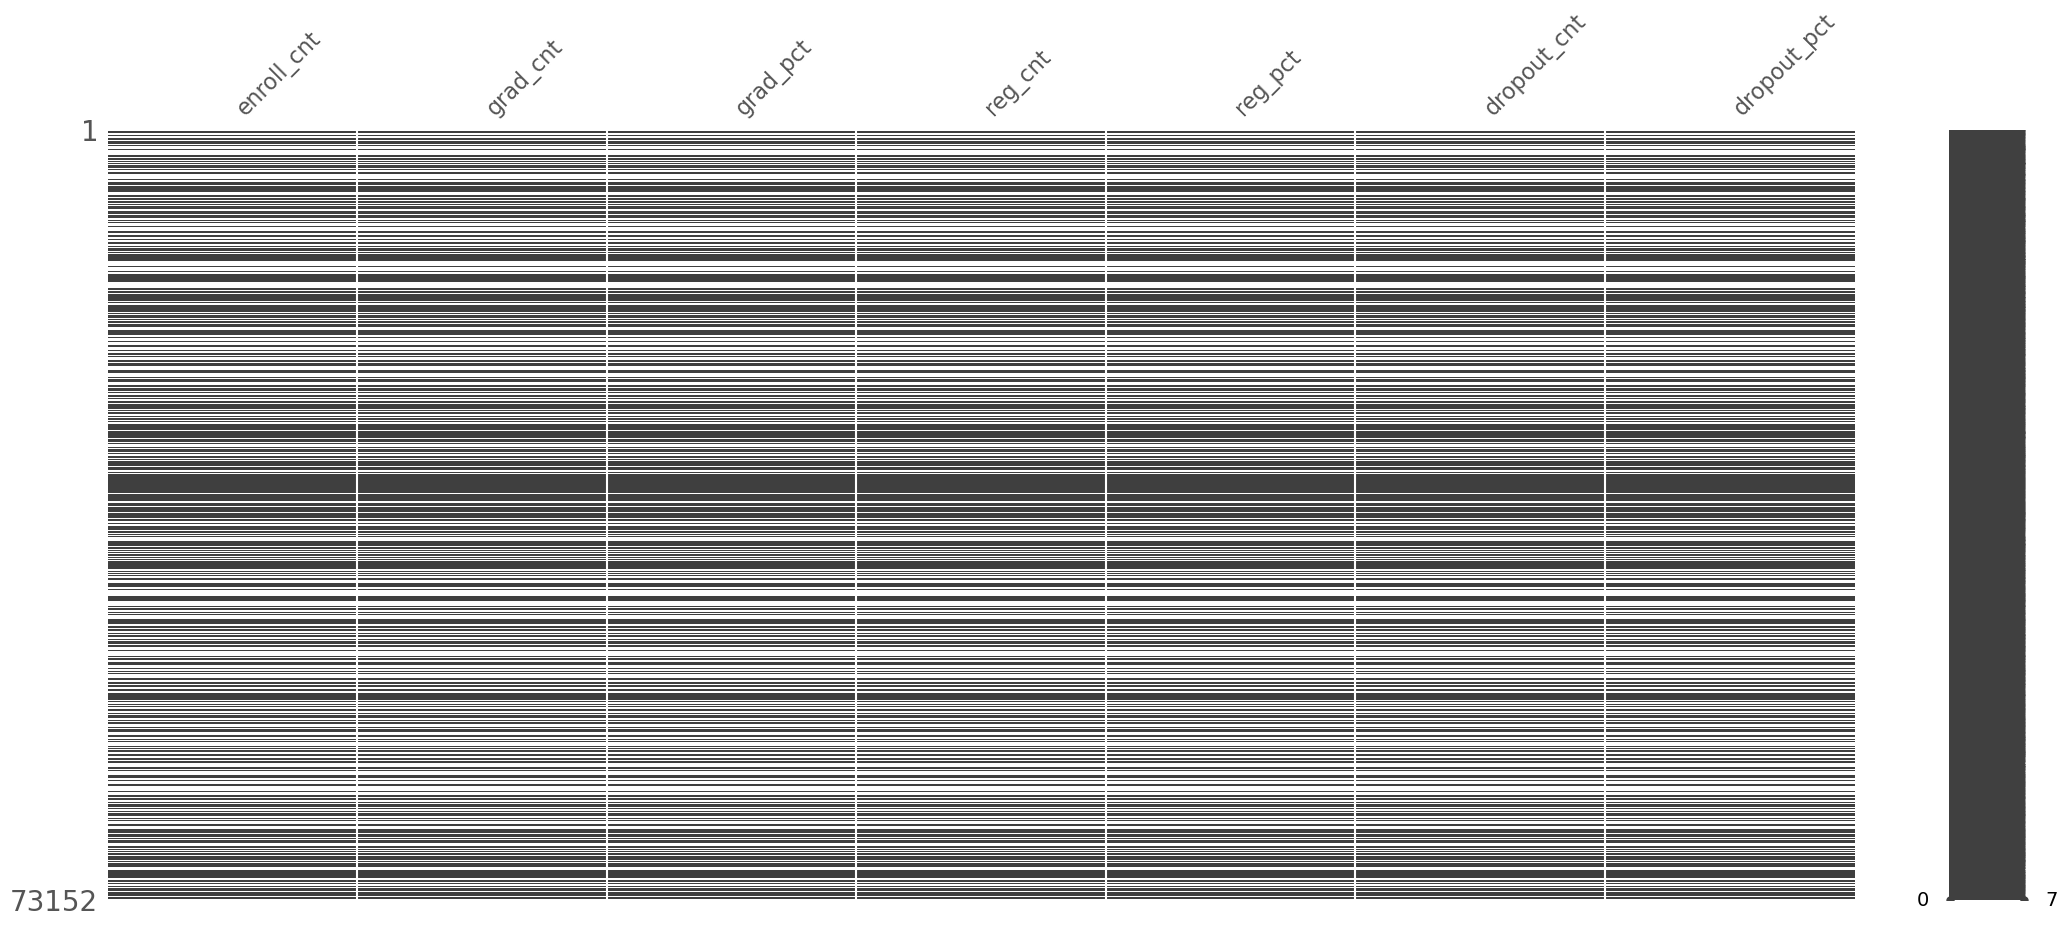

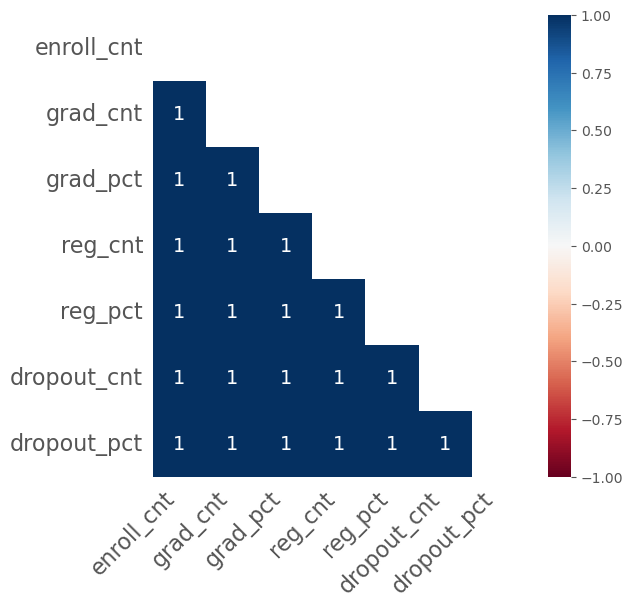

In [60]:
# Using missingnos matrix, we can check if there is any pattern to the missing data of all the numeric attributes.

# Visualize the amount of missing data using missingno's bar chart.
msno.bar(df[columns]);

# To see if there is a pattern to the missing data.
a = msno.matrix(df[columns])
a.get_figure();

# Plot a heat map of the missing data to see if the locations where the data are missing are correlated.
# Code as referenced in O'Reilley's Machine Learning Pocket Reference.

a = msno.heatmap(df[columns], figsize = (6,6))
a.get_figure();                                    # Add a ; at the end to prevent it from displaying twice.

- As per the above bar plot, patterns & heatmap -  we can clearly observe that all numeric columns have similar pattern of missing values.

- As per the heatmap, all the numeric columns have null values at the same index, due to very stong positive co-relation among all, so we can drop it.

- [Code : As per the reference provided.](https://yu.instructure.com/courses/68594/files/3996938?wrap=1)

In [61]:
# Dropping rows with nan values 
df.dropna(inplace=True)

- We have observed 33,478 NaN values in features with suffixes _cnt and _pct. We can drop these values, as the rows contain data that essentially constitute a multi-variable unique identifier (e.g., aggregation_index, NRC code/desc, county code/name, nyc_ind, subgroup code/name collectively form a unique identifier for a given set of metrics). Since there are no associated metrics, this simply reflects the absence of data for that particular subgroup within a specific district.

In [62]:
# Check for missing values in each columns.
# sanity check 

df.isnull().sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64

- no null values are present

#### Prepare Target Variable

In [63]:
# Calculate the median percentage of dropout column
median_reg_pct = df["dropout_pct"].median()

# Create a new categorical variable based on the conditions using lambda function
df['dropout_pct_level'] = df['dropout_pct'].apply(lambda x: 'low' if x < 0.5 * median_reg_pct 
                                          else ('medium' if 0.5 * median_reg_pct < x <= 1.5 * median_reg_pct 
                                                else ('high' if x > 1.5 * median_reg_pct else np.nan)))

df['dropout_pct_level'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [64]:
# Removing  the "dropout_pct" and "dropout_cnt" attributes
df.drop(['dropout_cnt','dropout_pct'], axis=1, inplace=True)

- This is done to eliminate the collinearity that will result from the addition of the “dropout_pct_level” indicator to our collection of attributes.

In [65]:
# Dropping columns with the suffix '_cnt'
df = df.drop(columns=[col for col in df.columns if col.endswith('_cnt')])

- This is done to eliminate collinearity, as columns with the same name ending in _pct and _cnt contain similar information. Therefore we are dropping all columns that end with _cnt

In [66]:
#  Dropping the columns which are not relevent to for our analysis
df_dropped_cat_cols = df.drop(columns=["report_school_year", "aggregation_index","aggregation_type","nrc_code","county_code"])

- Dropping the above columns which does not provide any significant information for our analysis. 

#### Null Error Percentages

In [67]:
# Check class distribution
class_counts = df['dropout_pct_level'].value_counts()
print("Class distribution:\n", class_counts)

# Null Error Percentages
class_percentage = df['dropout_pct_level'].value_counts(normalize=True) * 100
print("\nClass distribution percentages:\n", class_percentage)


Class distribution:
 high      14880
low       13315
medium    11479
Name: dropout_pct_level, dtype: int64

Class distribution percentages:
 high      37.505671
low       33.561022
medium    28.933306
Name: dropout_pct_level, dtype: float64


- Most dropout rates are either high (37.51%) or low (33.56%), with fewer cases in the medium category (28.93%).
- Focusing on reducing high dropout rates and learning from low rates can help improve student retention.

### 4.1 Handling Skewness

- We observed that the majority of the numerical columns have skewness. To address this issue, we are implementing the Box-Cox method. Before proceeding checking if there are any zero values or negative values in each feature since Box-Cox works better with positive values.

In [68]:
# sanity check 
df.isnull().sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
grad_pct              0
reg_pct               0
dropout_pct_level     0
dtype: int64

In [69]:
# Checking for negative value.
# Selecting only numeric columns 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

negative_check = df[numeric_cols].apply(lambda x: (x < 0).any())

print(negative_check)

grad_pct    False
reg_pct     False
dtype: bool


- Clearly we dont have any negative values in our features.

In [70]:
# Checking for zero values.

zero_check = df[numeric_cols].apply(lambda x: (x == 0).any())

print(zero_check)

grad_pct    True
reg_pct     True
dtype: bool


-  All  features have zero values. To handle them, we will add a small constant in the Box-Cox method. Reference : https://zahin178.medium.com/managing-skewness-in-zero-valued-columns-strategies-and-techniques-ee5be108d0fb 

In [71]:
columns = ['grad_pct', 'reg_pct']


# Applying  Box-Cox transformation to each column.

for col in columns:
    
    # Increasing  values by 1 to handle zeros
    df[col] += 1
    
    # Performing Box-Cox transformation and save the lambda value
    fitted_data, fitted_lambda = stats.boxcox(df[col])
    
    # Replacing original column with transformed data
    df[col] = fitted_data
    
    # Optional: Print lambda value for each column
    print(f"Lambda value for {col}: {fitted_lambda}")

Lambda value for grad_pct: 3.6806968820706536
Lambda value for reg_pct: 0.8457330000987642


#### [Reference](https://www.geeksforgeeks.org/box-cox-transformation-using-python/)

### 4.2 Handling Outliers

In [72]:
numeric_colms =  [ 'grad_pct','reg_pct']

# Looping through numeric columns to get the lower and upper bound values.  
for col in numeric_colms:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)                 
    lower_bound = q1 - (1.5 * iqr)
    range = [lower_bound, upper_bound]
    print(f"range in {col}:",range)
    
    # checking the maximum value 
    max_value = df[col].max()
    print(f"The maximum value in {col} is: {max_value}")

range in grad_pct: [-1193307.9998086258, 9312638.933739543]
The maximum value in grad_pct is: 6476932.330117617
range in reg_pct: [5.391816123081686, 50.08452613780942]
The maximum value in reg_pct is: 57.41622226539299


- The outliers are valid data points.For example, in the feature grad_pct, it shows the  percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year, the maximum value is 6476932.33, while the upper bound is also 9312638.93.  therefore it is a valid data value.

- Similarly, for reg_pct, the percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma, comparing the upper bound with the maximum value also indicates a valid data point.

----

<b> [Back to Content](#Content) </b>

## 5. Prepped Data Review

In [73]:
# Checking every columns has the correct data types.

df.dtypes

report_school_year     object
aggregation_index      object
aggregation_type       object
aggregation_name       object
nrc_code               object
nrc_desc               object
county_code            object
county_name            object
nyc_ind                object
membership_desc        object
subgroup_code          object
subgroup_name          object
grad_pct              float64
reg_pct               float64
dropout_pct_level      object
dtype: object

In [74]:
# Ensure that there are no duplicates.

df.duplicated().sum()

0

In [75]:
# Checking the descriptive statistics.

df.describe()

grad_pct       reg_pct
count  3.967400e+04  39674.000000
mean   3.972877e+06     27.731417
std    1.753147e+06      9.649978
min    0.000000e+00      0.000000
25%    2.746422e+06     22.151582
50%    4.236861e+06     27.837024
75%    5.372909e+06     33.324760
max    6.476932e+06     57.416222

In [76]:
# Ensuring that there is no null value present.

df.isnull().sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
grad_pct              0
reg_pct               0
dropout_pct_level     0
dtype: int64

#### Ensuring Univariate

count     39674
unique        3
top        high
freq      14880
Name: dropout_pct_level, dtype: object

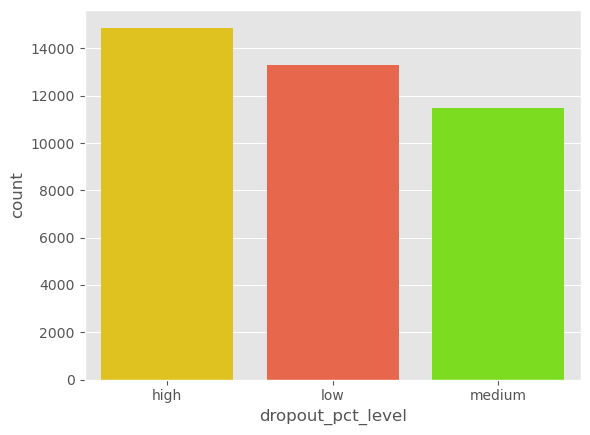

In [77]:
# Creating a dictionary to map categories to colors
color_mapping = { 'low': '#FFD700', 'medium': '#FF5733','high': '#7CFC00'} 

sns.countplot(data = df, x = 'dropout_pct_level', palette=color_mapping.values())

# Summary statistics for 'reg_pct_level'
display(df['dropout_pct_level'].describe())

- The new feature  dropout_pct_level has three unique values, with high having the highest count of 14,880, followed by low and medium in second and third place, respectively.

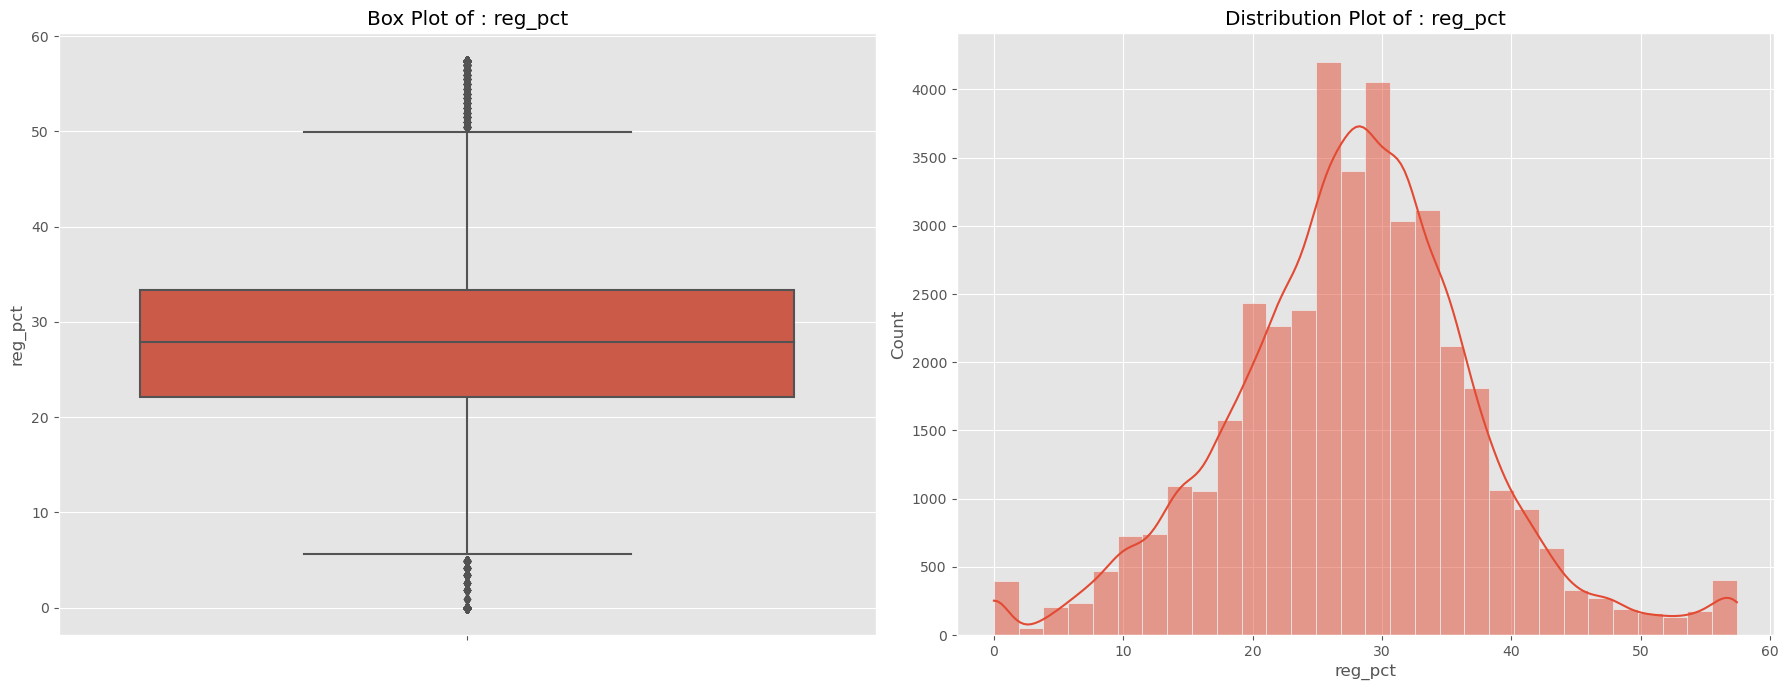

count    39674.000000
mean        27.731417
std          9.649978
min          0.000000
25%         22.151582
50%         27.837024
75%         33.324760
max         57.416222
Name: reg_pct, dtype: float64
Median : 27.83702426374777

Total Number of null values : 0 count, 0.0 %


In [78]:
#calling the function 
box_dist_plot(df,'reg_pct') 

- There are no visible outliers, and the distribution shows no significant change

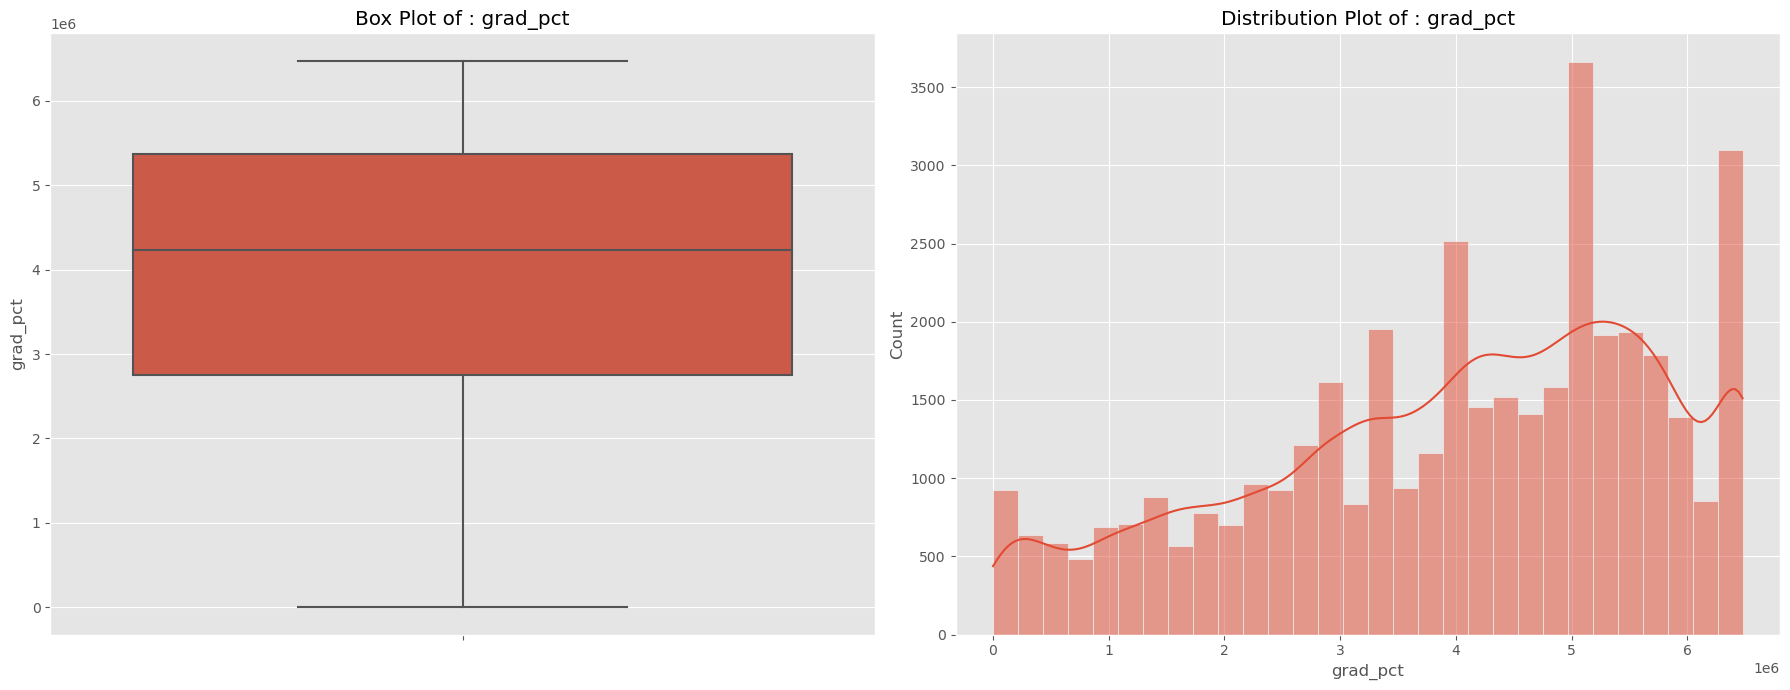

count    3.967400e+04
mean     3.972877e+06
std      1.753147e+06
min      0.000000e+00
25%      2.746422e+06
50%      4.236861e+06
75%      5.372909e+06
max      6.476932e+06
Name: grad_pct, dtype: float64
Median : 4236861.136219403

Total Number of null values : 0 count, 0.0 %


In [79]:
#calling the function 
box_dist_plot(df,'grad_pct') 

- There are no visible outliers, and the distribution shows no significant change

#### Ensuring Bivariate

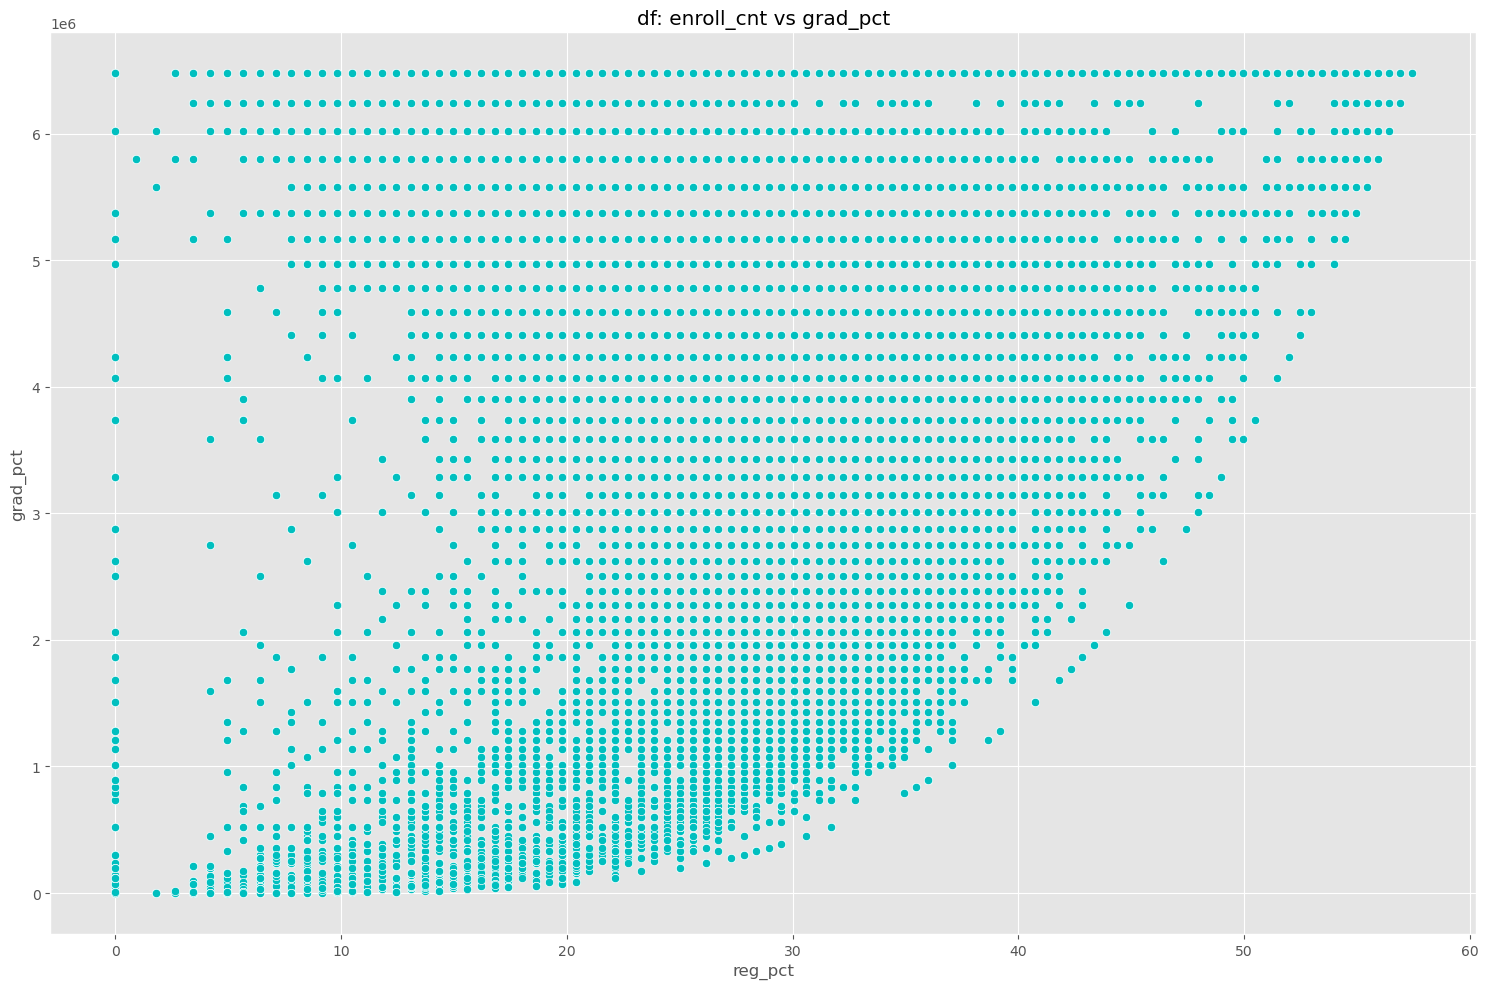

In [80]:
# Create a figure with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# First and only subplot
sns.scatterplot(x='reg_pct', y='grad_pct', data=df, color='c', ax=ax)
ax.set_title('df: enroll_cnt vs grad_pct')

# Display the plot
plt.tight_layout()
plt.show()

- Overall, the scatter plot provides clear evidence of a strong relationship between the columns .

In [81]:
def plot_bar_categorical_vs_categorical(df, cat_feature1, cat_feature2):
    """
    Plots a bar plot to visualize the relationship between two categorical features.
    
    Parameters:
    df (DataFrame): The dataframe containing the data.
    cat_feature1 (str): The first categorical feature (x-axis).
    cat_feature2 (str): The second categorical feature (used for hue).
    """
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=cat_feature1, hue=cat_feature2)
    plt.title(f'Bar Plot of {cat_feature1} vs {cat_feature2}')
    plt.xlabel(cat_feature1)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title=cat_feature2)
    plt.show()


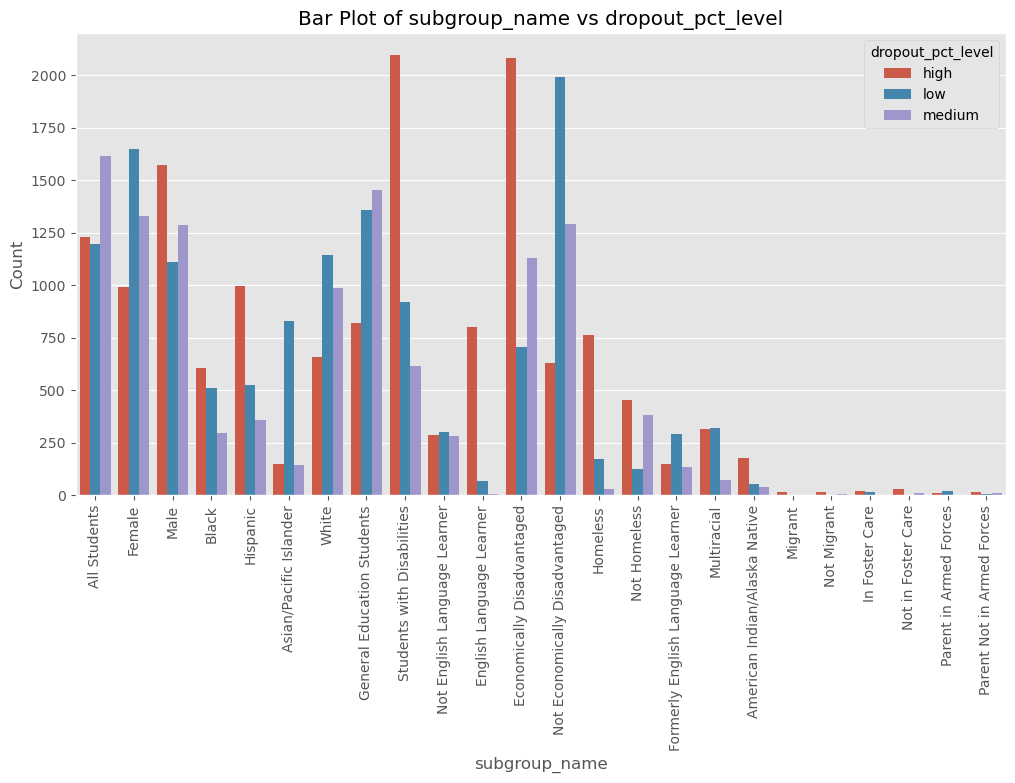

In [82]:
plot_bar_categorical_vs_categorical(df, 'subgroup_name', 'dropout_pct_level')

- Students with disabilities subgroup name  has the maximum percentage of dropout. 

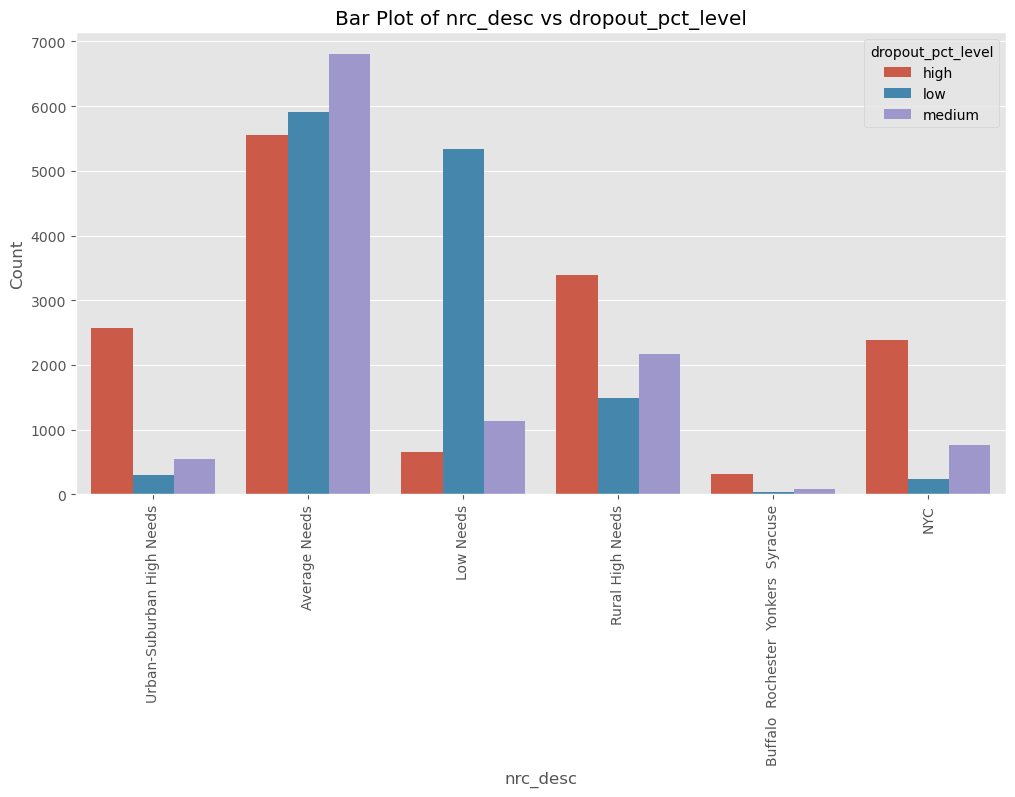

In [83]:
plot_bar_categorical_vs_categorical(df, 'nrc_desc', 'dropout_pct_level')

- School district with average needs has the  maximum medium chances of getting droppedout.

In [84]:
def plot_categorical_vs_numerical(df, cat_feature, num_feature):
    """
    Plots a bar plot
    a categorical feature and a numerical feature.
    
    Parameters:
    df (DataFrame): The dataframe containing the data.
    cat_feature (str): The categorical feature.
    num_feature (str): The numerical feature.
    """
    # 1. bar Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x=cat_feature, y=num_feature)
    plt.title(f'bar Plot of {num_feature} by {cat_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel(num_feature)
    plt.xticks(rotation=45)
    plt.show()

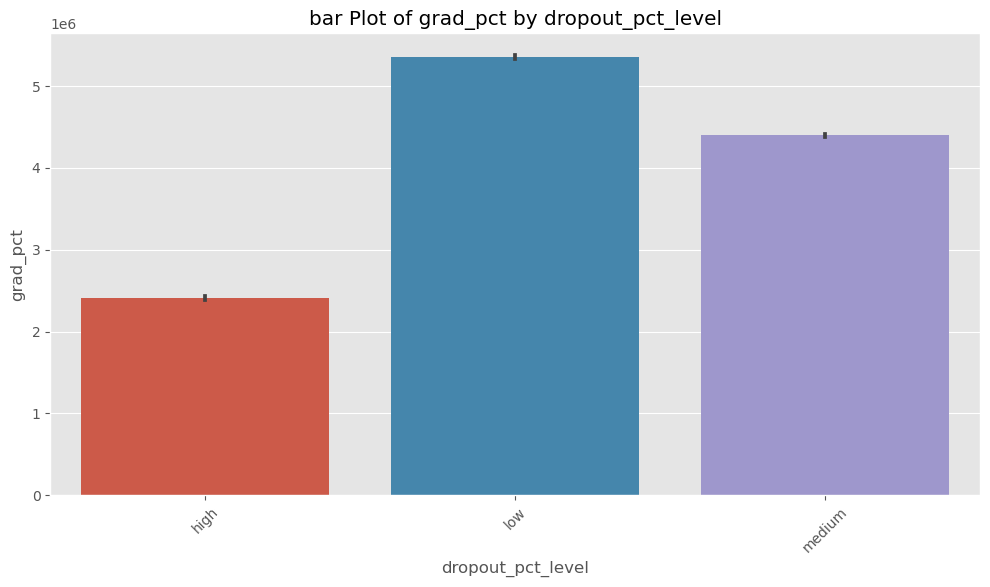

In [85]:
plot_categorical_vs_numerical(df, 'dropout_pct_level', 'grad_pct')

Students having low category of dropout_pct_level getting graduated at the end of the given school year is maximum.

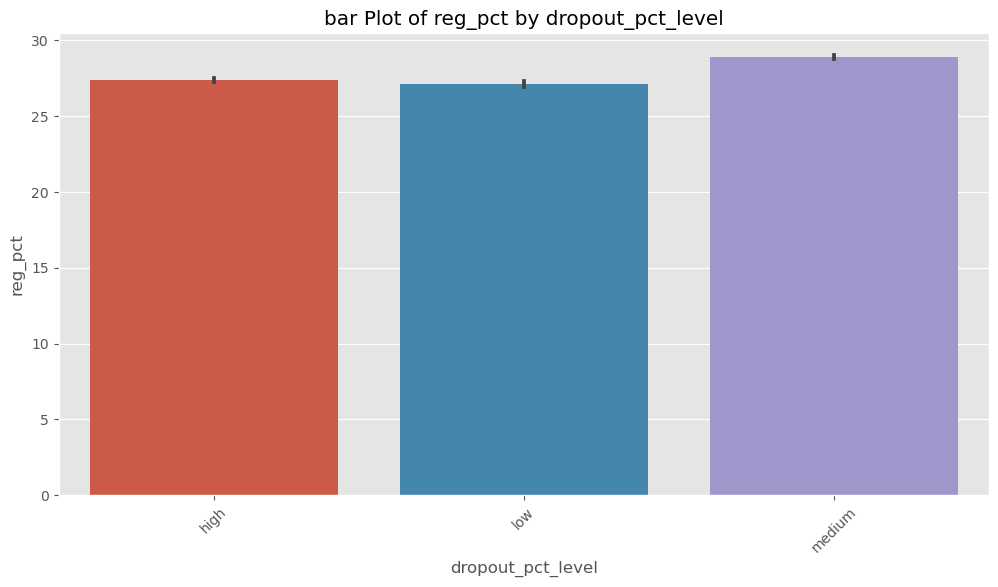

In [86]:
plot_categorical_vs_numerical(df, 'dropout_pct_level', 'reg_pct')

- Students having medium category of dropout_pct_level getting regent diploma at the end of the given school year is maximum.

#### Ensuring Multivariate

Multivariate Analysis (Mean values by dropout_pct_level):
                     reg_pct      grad_pct
dropout_pct_level                         
high               27.383313  2.411296e+06
low                27.122642  5.352851e+06
medium             28.888804  4.396431e+06


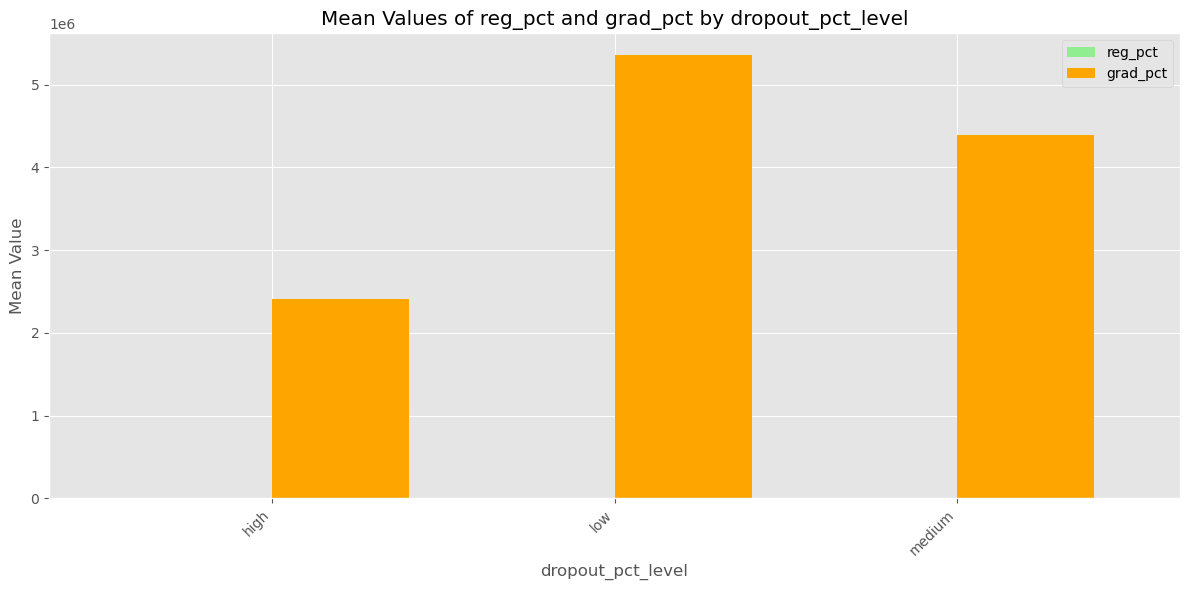

In [87]:
# Calculate mean values of each numerical feature grouped by target class
multivariate_summary = df.groupby('dropout_pct_level')[['reg_pct',  'grad_pct']].mean()

# Display the result
print("Multivariate Analysis (Mean values by dropout_pct_level):")
print(multivariate_summary)

# Plotting bar chart for mean values by dropout_pct_level
multivariate_summary.plot(kind='bar', figsize=(12, 6), color=['lightgreen', 'orange'], width=0.8)

# Add titles and labels
plt.title('Mean Values of reg_pct and grad_pct by dropout_pct_level')
plt.xlabel('dropout_pct_level')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Display plot
plt.show()


- Schools in the "low" category of dropout_pct_level have maximum mean percentage of getting graduated.

----

<b> [Back to Content](#Content) </b>

## 6. Dimensionality Reduction

In [88]:
df.isna().sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
grad_pct              0
reg_pct               0
dropout_pct_level     0
dtype: int64

In [89]:
# Converting y to number coding as 'low'=0, 'medium'=1, 'high'=2.

df['dropout_pct_level'] = df['dropout_pct_level'].map({'low': 0, 'medium': 1, 'high': 2})

# Seperating target attribute from rest of the attributes.
y = df['dropout_pct_level']

y.head()

0    2
1    2
2    2
4    2
5    2
Name: dropout_pct_level, dtype: int64

In [90]:
# dropping the 'dropout_pct_level' column

X = df.drop('dropout_pct_level', axis=1)

X.head(2)

report_school_year aggregation_index aggregation_type  \
0            2018-19                 3         District   
1            2018-19                 3         District   

              aggregation_name nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT        3  Urban-Suburban High Needs   

  county_code county_name nyc_ind                     membership_desc  \
0           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   
1           1      ALBANY       0  2013 Total Cohort - 6 Year Outcome   

  subgroup_code subgroup_name      grad_pct    reg_pct  
0             1  All Students  1.863579e+06  30.053055  
1             2        Female  2.386000e+06  32.783541

In [91]:
# Get the dummy data from the categorical columns.

cat_cols = ['report_school_year', 'aggregation_index', 'aggregation_type', 'aggregation_name', 
            'nrc_code', 'nrc_desc', 'county_code', 'county_name', 'nyc_ind', 'membership_desc', 
            'subgroup_code', 'subgroup_name']

X_cat_dummy = pd.get_dummies(X[cat_cols], drop_first=True).astype(int)

X_cat_dummy.head(2)

aggregation_name_ADIRONDACK CENTRAL SCHOOL DISTRICT  \
0                                                  0     
1                                                  0     

   aggregation_name_AFTON CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   

   aggregation_name_AKRON CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   

   aggregation_name_ALBANY CITY SCHOOL DISTRICT  \
0                                             1   
1                                             1   

   aggregation_name_ALBION CENTRAL SCHOOL DISTRICT  \
0                                                0   
1                                                0   

   aggregation_name_ALDEN CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   

   aggregation_name_ALEXANDER CENTRAL SCHOOL DISTRICT  \
0                                                  0    
1                                                  0    

   aggregation_name_ALEXANDRIA CENTRAL SCHOOL DISTRICT  \
0                                                  0     
1                                                  0     

   aggregation_name_ALFRED-ALMOND CENTRAL SCHOOL DISTRICT  \
0                                                  0        
1                                                  0        

   aggregation_name_ALLEGANY-LIMESTONE CENTRAL SCHOOL DISTRICT  ...  \
0                                                  0            ...   
1                                                  0            ...   

   subgroup_name_Multiracial  subgroup_name_Not Economically Disadvantaged  \
0                          0                                             0   
1                          0                                             0   

   subgroup_name_Not English Language Learner  subgroup_name_Not Homeless  \
0                                           0                           0   
1                                           0                           0   

   subgroup_name_Not Migrant  subgroup_name_Not in Foster Care  \
0                          0                                 0   
1                          0                                 0   

   subgroup_name_Parent Not in Armed Forces  \
0                                         0   
1                                         0   

   subgroup_name_Parent in Armed Forces  \
0                                     0   
1                                     0   

   subgroup_name_Students with Disabilities  subgroup_name_White  
0                                         0                    0  
1                                         0                    0  

[2 rows x 860 columns]

In [92]:
# Drop the original columns from the DataFrame.

X.drop(columns=cat_cols, inplace=True)

In [93]:
# Standarise the numeric attributes.

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(X)

In [94]:
# Convert the nd array of X_std to dataframe.

X_std = pd.DataFrame(X_std, columns=['grad_pct','reg_pct'])

In [95]:
# Reset Index to merge correctly.

X_std.reset_index(inplace=True, drop=True)
X_cat_dummy.reset_index(inplace=True, drop=True)

In [96]:
# Concatenate the original DataFrame with the one-hot encoded columns.

X = pd.concat([X_std, X_cat_dummy], axis=1)

X.head()

grad_pct   reg_pct  aggregation_name_ADIRONDACK CENTRAL SCHOOL DISTRICT  \
0 -1.203165  0.240588                                                  0     
1 -0.905171  0.523544                                                  0     
2 -1.494472 -0.046961                                                  0     
3 -1.357296  0.410878                                                  0     
4 -1.722803 -0.105074                                                  0     

   aggregation_name_AFTON CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   aggregation_name_AKRON CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   aggregation_name_ALBANY CITY SCHOOL DISTRICT  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   aggregation_name_ALBION CENTRAL SCHOOL DISTRICT  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   aggregation_name_ALDEN CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   aggregation_name_ALEXANDER CENTRAL SCHOOL DISTRICT  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   aggregation_name_ALEXANDRIA CENTRAL SCHOOL DISTRICT  ...  \
0                                                  0    ...   
1                                                  0    ...   
2                                                  0    ...   
3                                                  0    ...   
4                                                  0    ...   

   subgroup_name_Multiracial  subgroup_name_Not Economically Disadvantaged  \
0                          0                                             0   
1                          0                                             0   
2                          0                                             0   
3                          0                                             0   
4                          0                                             0   

   subgroup_name_Not English Language Learner  subgroup_name_Not Homeless  \
0                                           0                           0   
1                                           0                           0   
2                                           0                           0   
3                                           0                           0   
4                                           0                           0   

   subgroup_name_Not Migrant  subgroup_name_Not in Foster Care  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          

In [97]:
# Checking the shape of dataframe having independent attributes.

X.shape

(39674, 862)

In [98]:
X.isna().sum()

grad_pct                                               0
reg_pct                                                0
aggregation_name_ADIRONDACK CENTRAL SCHOOL DISTRICT    0
aggregation_name_AFTON CENTRAL SCHOOL DISTRICT         0
aggregation_name_AKRON CENTRAL SCHOOL DISTRICT         0
                                                      ..
subgroup_name_Not in Foster Care                       0
subgroup_name_Parent Not in Armed Forces               0
subgroup_name_Parent in Armed Forces                   0
subgroup_name_Students with Disabilities               0
subgroup_name_White                                    0
Length: 862, dtype: int64

- Attribues increased a lot due to one-hot encoding.

In [99]:
# Create the train & test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle= True)

- Training and testing data is split 70-30 of X,y.

In [100]:
# # Print the shapes of the resulting datasets.

print("Training dataset shapes ->  X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing dataset shapes  ->  X: {}, y: {}".format(X_test.shape, y_test.shape))

Training dataset shapes ->  X: (27771, 862), y: (27771,)
Testing dataset shapes  ->  X: (11903, 862), y: (11903,)


----

<b> [Back to Content](#Content) </b>

### 6.1 Variance Threshold

- Variance Threshold is a method that filters out features with little variation, as they are often less useful for predicting outcomes in machine learning models.

In [101]:
# Creating the VarianceThreshold object (remove features with variance below the threshold)
selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the data
selector.fit(X_train)

selector.get_support()

# Get the list of featurs with low variance.
low_var_cols = [col for col in X.columns if col not in X.columns[selector.get_support()]]

print(f"Total number of attributes with Low Variance : {len(low_var_cols)}")

Total number of attributes with Low Variance : 744


- This shows that numeric columns has high variance

In [102]:
# Dropping Low Variance attributes from X_train and X_test.

X_train = X_train.drop(low_var_cols, axis=1)

X_test = X_test.drop(low_var_cols, axis=1)

print(f"Shape of dataframe after removing the low variance columns : {X_train.shape}")
print()
print(f"Shape of dataframe after removing the low variance columns : {X_test.shape}")

Shape of dataframe after removing the low variance columns : (27771, 118)

Shape of dataframe after removing the low variance columns : (11903, 118)


In [103]:
# Check for NaN values.

print("Number of NaN values in X_new : ", np.isnan(X_train).sum())

# Check for NaN values.

print("Number of NaN values in X_new : ", np.isnan(X_test).sum())

Number of NaN values in X_new :  grad_pct                                        0
reg_pct                                         0
nrc_code_2                                      0
nrc_code_3                                      0
nrc_code_4                                      0
                                               ..
subgroup_name_Not Economically Disadvantaged    0
subgroup_name_Not English Language Learner      0
subgroup_name_Not Homeless                      0
subgroup_name_Students with Disabilities        0
subgroup_name_White                             0
Length: 118, dtype: int64
Number of NaN values in X_new :  grad_pct                                        0
reg_pct                                         0
nrc_code_2                                      0
nrc_code_3                                      0
nrc_code_4                                      0
                                               ..
subgroup_name_Not Economically Disadvantaged    0
subgroup

----

<b> [Back to Content](#Content) </b>

### 6.2 Forward Feature Selection

Reference: https://www.analyticsvidhya.com/blog/2021/04/forward-feature-selection-and-its-implementation/

In [104]:
# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=21, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [105]:
# Fit the Sequential Feature Selector model_1
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    4.4s finished

[2024-11-17 23:39:03] Features: 1/21 -- score: -0.34998576729140674[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 117 out of 117 | elapsed:    6.7s finished

[2024-11-17 23:39:10] Features: 2/21 -- score: -0.3288354908730018[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 116 out of 116 | elapsed:    6.8s finished

[2024-11-17 23:39:17] Features: 3/21 -- score: -0.31582971263081916[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

In [106]:
# Extracting the names of the selected features after the fitting process.

feat_names_1 = list(sfs1.k_feature_names_)
feat_names_1

['grad_pct',
 'reg_pct',
 'nrc_code_4',
 'nrc_code_6',
 'county_code_26',
 'county_code_28',
 'county_code_42',
 'county_code_46',
 'county_code_47',
 'county_code_62',
 'county_code_65',
 'county_code_66',
 'county_name_ALLEGANY',
 'membership_desc_2015 Total Cohort - 4 Year Outcome',
 'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019',
 'subgroup_code_5',
 'subgroup_code_10',
 'subgroup_code_11',
 'subgroup_code_13',
 'subgroup_code_16',
 'subgroup_code_20']

In [107]:
# Define the selected feature names for separation
selected_features = feat_names_1

# Creating a new DataFrame with the selected features
X_train_best = X_train[selected_features]
X_test_best = X_test[selected_features]

# Display the shape of the new DataFrame to confirm the selection

display(X_train_best.shape)
display(X_train_best.shape)

(27771, 21)

(27771, 21)

In [108]:
# Checking the shapes of the final resulting datasets before training the models.

print("All best features Training dataset shapes ->  X: {}, y: {}".format(X_train_best.shape, y_train.shape))
print("All best features Testing dataset shapes  ->  X: {}, y: {}".format(X_test_best.shape, y_test.shape))

All best features Training dataset shapes ->  X: (27771, 21), y: (27771,)
All best features Testing dataset shapes  ->  X: (11903, 21), y: (11903,)


- Here we performed forward selection and identified 21 best features, which will be used to train the models.
  
- We will keep the 21 best feature for all the models to similar dataset so to check the performance of different models, and hence we can conclude that which models is performing the best.

- Feature selection can highlight the most significant variables influencing the outcome, helping analyst to gain insights into which features are most relevant for the problem.

- By selecting only the most important features, feature selection helps reduce unnecessary information, making the model's predictions more accurate and reliable.

----

<b> [Back to Content](#Content) </b>

## 7. Modeling 

#### Null Error Rate

In [109]:
# Check class distribution
class_counts = df['dropout_pct_level'].value_counts()
print("Class distribution:\n", class_counts)

# Null Error Percentages
class_percentage = df['dropout_pct_level'].value_counts(normalize=True) * 100
print("\nClass distribution percentages:\n", class_percentage)

Class distribution:
 2    14880
0    13315
1    11479
Name: dropout_pct_level, dtype: int64

Class distribution percentages:
 2    37.505671
0    33.561022
1    28.933306
Name: dropout_pct_level, dtype: float64


- The above distribution of data is almost balanced

### 7.1 Decision Tree Model

In [110]:
# Loading DecisionTreeClassifier 
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_best, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
# 10 k-fold splits for training dataset.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy
accuracy_dt = cross_val_score(dt_model, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset: {accuracy_dt}")
print(f"Mean Accuracy: {np.mean(accuracy_dt)}\n")

# Precision 
precision_scorer = make_scorer(precision_score, average='macro')
precision_dt = cross_val_score(dt_model, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset: {precision_dt}")
print(f"Mean Precision: {np.mean(precision_dt)}\n")

# Recall 
recall_scorer = make_scorer(recall_score, average='macro')
recall_dt = cross_val_score(dt_model, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset: {recall_dt}")
print(f"Mean Recall: {np.mean(recall_dt)}\n")

# F1 Score 
f1_scorer = make_scorer(f1_score, average='macro')
f1_dt = cross_val_score(dt_model, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset: {f1_dt}")
print(f"Mean F1 Score: {np.mean(f1_dt)}\n")

# Roc-AUC 
roc_auc_dt = cross_val_score(dt_model, X_train_best, y_train, cv=kf, scoring='roc_auc_ovr')
print(f"Roc-Auc Scores of training dataset: {roc_auc_dt}")
print(f"Mean Roc-Auc Score: {np.mean(roc_auc_dt)}")


Accuracy of training dataset: [0.75449964 0.77385668 0.75477134 0.76017285 0.74756932 0.77493698
 0.75693194 0.7806986  0.76413396 0.76593446]
Mean Accuracy: 0.7633505761742877

Precision of training dataset: [0.74783855 0.7668559  0.74844305 0.75383182 0.74287497 0.7676733
 0.74998584 0.77540558 0.75795496 0.75710892]
Mean Precision: 0.7567972876381137

Recall of training dataset: [0.74807797 0.76678101 0.74891973 0.75350315 0.74284667 0.76890022
 0.75058854 0.77468856 0.75807805 0.75800174]
Mean Recall: 0.757038564467946

F1 Scores of training dataset: [0.74772106 0.76665845 0.74858736 0.75355547 0.7427405  0.76796794
 0.75006921 0.77463534 0.75795934 0.75672468]
Mean F1 Score: 0.7566619354693872

Roc-Auc Scores of training dataset: [0.84546412 0.86665542 0.85189829 0.85886034 0.84694894 0.86527004
 0.84844842 0.87118114 0.86365498 0.85934637]
Mean Roc-Auc Score: 0.8577728067844361


----

<b> [Back to Content](#Content) </b>

### 7.2 Random Forest Model

In [112]:
# Loading RandomForestClassifier 

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_best, y_train)

RandomForestClassifier(random_state=42)

- n_estimators=100: Specifies the number of decision trees to be built in the random forest.
- random_state=42: Sets a fixed seed for randomness, ensuring consistent results across runs.

In [113]:
# 10 k-fold splits for training dataset.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy
accuracy_rf = cross_val_score(rf_model, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset: {accuracy_rf}")
print(f"Mean Accuracy: {np.mean(accuracy_rf)}\n")

# Precision 
precision_scorer = make_scorer(precision_score, average='macro')
precision_rf = cross_val_score(rf_model, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset: {precision_rf}")
print(f"Mean Precision: {np.mean(precision_rf)}\n")

# Recall 
recall_scorer = make_scorer(recall_score, average='macro')
recall_rf = cross_val_score(rf_model, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset: {recall_rf}")
print(f"Mean Recall: {np.mean(recall_rf)}\n")

# F1 Score 
f1_scorer = make_scorer(f1_score, average='macro')
f1_rf = cross_val_score(rf_model, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset: {f1_rf}")
print(f"Mean F1 Score: {np.mean(f1_rf)}\n")

# Roc-AUC 
roc_auc_rf = cross_val_score(rf_model, X_train_best, y_train, cv=kf, scoring='roc_auc_ovr')
print(f"Roc-Auc Scores of training dataset: {roc_auc_rf}")
print(f"Mean Roc-Auc Score: {np.mean(roc_auc_rf)}")


Accuracy of training dataset: [0.77789777 0.78646021 0.77997839 0.78033849 0.77313648 0.78501981
 0.77925819 0.79654303 0.7806986  0.7839395 ]
Mean Accuracy: 0.7823270472535766

Precision of training dataset: [0.7707045  0.78025125 0.7736142  0.77417209 0.7692     0.77723311
 0.77167417 0.79105053 0.77619824 0.77497758]
Mean Precision: 0.7759075676903509

Recall of training dataset: [0.76882078 0.77837351 0.77150181 0.77394291 0.76743796 0.77658181
 0.77118328 0.79006972 0.77467807 0.7752557 ]
Mean Recall: 0.7747845541364935

F1 Scores of training dataset: [0.76929802 0.77896074 0.77211839 0.7738194  0.76811767 0.77674711
 0.77138745 0.79028092 0.77496426 0.77465195]
Mean F1 Score: 0.7750345906489452

Roc-Auc Scores of training dataset: [0.91704432 0.92537637 0.92316787 0.92234616 0.91443473 0.92465206
 0.91458714 0.93159993 0.92087415 0.92346672]
Mean Roc-Auc Score: 0.9217549445367592


----

<b> [Back to Content](#Content) </b>

### 7.3 Gradient Boosting Classifier Model

In [114]:
# Loading GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbc_model.fit(X_train_best, y_train)

GradientBoostingClassifier(random_state=42)

- n_estimators (100) - Number of boosting stages, balances training time and model complexity.
- learning_rate (0.1) - Shrinkage factor for tree contributions, lower values improve generalization but require more trees.
- max_depth (3) - Maximum depth of each tree, controls model complexity and risk of overfitting.
- random_state (42) - Seed for reproducibility, ensures consistent results across runs.

In [ ]:
# 10 k-fold splits for training dataset.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy
accuracy_gbc = cross_val_score(gbc_model, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset: {accuracy_gbc}")
print(f"Mean Accuracy: {np.mean(accuracy_gbc)}\n")

# Precision 
precision_scorer = make_scorer(precision_score, average='macro')
precision_gbc = cross_val_score(gbc_model, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset: {precision_gbc}")
print(f"Mean Precision: {np.mean(precision_gbc)}\n")

# Recall 
recall_scorer = make_scorer(recall_score, average='macro')
recall_gbc = cross_val_score(gbc_model, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset: {recall_gbc}")
print(f"Mean Recall: {np.mean(recall_gbc)}\n")

# F1 Score 
f1_scorer = make_scorer(f1_score, average='macro')
f1_gbc = cross_val_score(gbc_model, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset: {f1_gbc}")
print(f"Mean F1 Score: {np.mean(f1_gbc)}\n")

# Roc-AUC 
roc_auc_gbc = cross_val_score(gbc_model, X_train_best, y_train, cv=kf, scoring='roc_auc_ovr')
print(f"Roc-Auc Scores of training dataset: {roc_auc_gbc}")
print(f"Mean Roc-Auc Score: {np.mean(roc_auc_gbc)}")


Accuracy of training dataset: [0.7487401  0.77961829 0.77997839 0.75477134 0.75765214 0.77061577
 0.75045013 0.76665466 0.76017285 0.76557436]
Mean Accuracy: 0.7634228037414191

Precision of training dataset: [0.74587481 0.77538269 0.77599216 0.75194938 0.75517899 0.7660154
 0.74448085 0.76394642 0.75796022 0.75743042]
Mean Precision: 0.7594211334357677



----

<b> [Back to Content](#Content) </b>

### 7.4 XG Boost Classifier Model

In [ ]:
# Loading XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, 
                          use_label_encoder=False,eval_metric='logloss', random_state=42)


xgb_model.fit(X_train_best, y_train)


- n_estimator (100) - Quick to train and provides a strong baseline.Increase if underfitting, decrease if slow.
- learning_rate (0.1) - Balances training speed and accuracy. Lower for better generalization.
- max_depth	(3) - Prevents overfitting while capturing patterns. Increase for complex data.
- use_label_encoder	(False) - Works better with modern pipelines. Keep unless dealing with legacy setups.
- eval_metric (logloss) - Standard for classification. Use auc or f1 for imbalanced datasets.


In [ ]:
# 10 k-fold splits for training dataset.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Accuracy
accuracy_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring='accuracy')
print(f"Accuracy of training dataset: {accuracy_xgb}")
print(f"Mean Accuracy: {np.mean(accuracy_xgb)}\n")

# Precision 
precision_scorer = make_scorer(precision_score, average='macro')
precision_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring=precision_scorer)
print(f"Precision of training dataset: {precision_xgb}")
print(f"Mean Precision: {np.mean(precision_xgb)}\n")

# Recall 
recall_scorer = make_scorer(recall_score, average='macro')
recall_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring=recall_scorer)
print(f"Recall of training dataset: {recall_xgb}")
print(f"Mean Recall: {np.mean(recall_xgb)}\n")

# F1 Score 
f1_scorer = make_scorer(f1_score, average='macro')
f1_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring=f1_scorer)
print(f"F1 Scores of training dataset: {f1_xgb}")
print(f"Mean F1 Score: {np.mean(f1_xgb)}\n")

# Roc-AUC 
roc_auc_xgb = cross_val_score(xgb_model, X_train_best, y_train, cv=kf, scoring='roc_auc_ovr')
print(f"Roc-Auc Scores of training dataset: {roc_auc_xgb}")
print(f"Mean Roc-Auc Score: {np.mean(roc_auc_xgb)}")


----

<b> [Back to Content](#Content) </b>

# 8. Model Selection

- For selecting our prefered model we will be considering the below table to make our decision.

| Parameters | DT    | RF    | GBC   | XGB   |
|------------|-------|-------|-------|-------|
| ATTRIBUTES | 21    | 21    | 21    | 21    |
| ACCURACY   | 0.76  | 0.78  | 0.76  | 0.75  |
| PRECISION  | 0.75  | 0.77  | 0.75  | 0.75  |
| RECALL     | 0.75  | 0.77  | 0.75  | 0.75  |
| F1 SCORE   | 0.75  | 0.77  | 0.75  | 0.75  |
| AUC SCORE  | 0.85  | 0.92  | 0.91  | 0.90  |

- Based on above table, the best model would be RF for the following reasons:

`AUC Score(0.92)`: RF has the highest AUC score, which indicates better performance in distinguishing between classes. A higher AUC score suggests that RF is more effective at handling the trade-offs between sensitivity and specificity.

`Accuracy(0.78)`: Accuracy is alsos highest however, since data is here balanced datasets, this metrics should also be considered for the judgement.

`Precision and F1 Score`: DT , GBC and XGB have similar precision and F1 scores, but the higher AUC score in RF suggests it can better discriminate.

`Attributes Used`: Here every models has the same amount of attributes with 21 columns. 

__Note:__ RF is the best choice as it achieves the highest AUC score without sacrificing other metrics.

In [ ]:
# Getting predictions for the test data for 21 best feature in Random Forest model 1.

y_pred_rf_best = rf_model.predict(X_test_best)
y_pred_rf_best

In [ ]:
# Calculating different parameters of our final selected model.

# Calculating accuracy.
accuracy = accuracy_score(y_test, y_pred_rf_best)

# Calculating precision, recall, and F1 score for each class, using 'macro' for unweighted average.
precision = precision_score(y_test, y_pred_rf_best, average='weighted')
recall = recall_score(y_test, y_pred_rf_best, average='weighted')
f1 = f1_score(y_test, y_pred_rf_best, average='weighted')


from sklearn.preprocessing import label_binarize

y_actual_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_predicted_binarized = label_binarize(y_pred_rf_best, classes=[0, 1, 2])

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_actual_binarized, y_predicted_binarized, average='macro')

# Display the metrics
print("Key Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

In [ ]:
# Creating Confusion matrix to check actual and predicted values.

cm = confusion_matrix(y_test, y_pred_rf_best)

cm_df = pd.DataFrame(cm, 
                     index=['Class 0', 'Class 1', 'Class 2'],  # True labels
                     columns=['Class 0', 'Class 1', 'Class 2'])  # Predicted labels

print("Confusion Matrix:")
display(cm_df)
print('Index: Actual Class & Columns: Predicted Class')
print()

# Visualize using Heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

`Class 0 (Actual)`:
Correctly classified as Class 0: 3212 instances.
Misclassified as Class 1: 553 instances.
Misclassified as Class 2: 241 instances.

`Class 1 (Actual)`:
Misclassified as Class 0: 476 instances.
Correctly classified as Class 1: 2390 instances.
Misclassified as Class 2: 594 instances.

`Class 2 (Actual)`:
Misclassified as Class 0: 164 instances.
Misclassified as Class 1: 429 instances.
Correctly classified as Class 2: 3844 instances.

----

<b> [Back to Content](#Content) </b>

## Conclusion

- grad_pct and dropout_pct has hinghly negative correlation . It means when one variable increases other might decrease.

- Students having low category of dropout_pct_level getting graduated at the end of the given school year is maximum.

- Students having medium category of dropout_pct_level getting regent diploma at the end of the given school year is maximum.

- As per the null error rate dataset is almost  balanced.

- We have selected  21 attributes for our further all four models training.

- After training all the models, we have selected RF as the best model, on the basis of F1 Score, Accuracy, Precision, AUC Score, Recall.

- The model is good at correctly classifying Class 2, but it often mistakes Class 1 and Class 0 for each other. It performs fairly well overall, but needs improvement in distinguishing between Class 0 and Class 1.

<b> [TOP⬆️](#Decision-Trees-&-Random-Forests) </b>

---
<h3><center>THE END</center></h3>

===================================================================================================================